# Ecuación de la Cuerda Vibrante

Vibraciones de Sistemas Continuos
---------------------------------

Master Universitario de Estructuras
-----------------------------------

Curso 2015 - 2016
-----------------

*Autor: Alejandro E. Martínez Castro* ( email:amcastro@ugr.es )
----------------------------

En este ejemplo se ilustrará el caso de vibraciones transversales en una cuerda vibrante. Se consideran los siguientes parámetros del modelo: 

- Cuerda fija en ambos extremos. 
- Longitud de la cuerda $l$. 
- Tensión del hilo $T$. 
- Densidad de masa por unidad de línea $\rho$. 

La cuerda se considera que tiene velocidad nula en el tiempo $t=0$. 

La posición inicial del hilo viene definida por un parámetro $\delta$, y es una función lineal definida a trozos: 

\begin{equation}
w(x,0) = f(x) = \sum_{n=1}^{\infty} D_m \,\sin(\alpha_m\,x) = \left\{
\begin{array}{lcl}
             4 \,\delta\,\dfrac{x}{l}, & \mathrm{si} & 0 \leq x \leq \dfrac{l}{4} \\
             \dfrac{4}{3}\,\delta\,\left(1-\dfrac{x}{l} \right), & \mathrm{si} & \dfrac{l}{4} \leq x \leq l 
             \end{array} \right.
\end{equation}

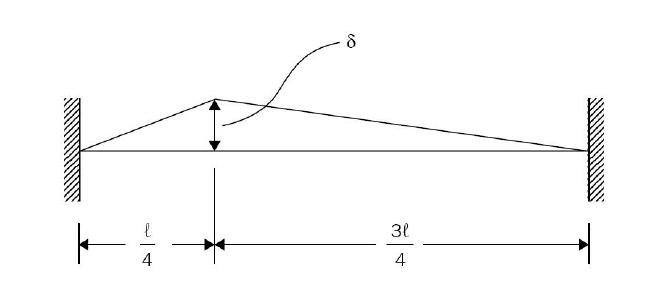

In [1]:
from IPython.display import Image
Image(filename='cvibrante1.png')

La solución para el desplazamiento transversal $w(x,t)$ tiene la siguiente expresión: 


\begin{equation}
w(x,t) = \dfrac{32 \,\delta}{3\,\pi^2} \sum_{m=1}^{\infty} \dfrac{1}{m^2}\,\sin \left( \dfrac{m\,\pi}{4}\right)\,\sin \left(\dfrac{m\,\pi \,x}{l} \right)\,\cos(\omega_m\,t) \nonumber
\end{equation}


con $\omega_m = \dfrac{m\,\pi}{l}\,\sqrt{\dfrac{T}{\rho}} $

A continuación se muestra la solución para una elección particular de los parámetros del modelo. 

- En primer lugar, se resolverá con 3 términos de la serie. 
- En segundo lugar, se resolverá con 10 términos de la serie. 

Los objetivos son: 

- Observar la solución en el dominio del tiempo.
- Observar que al incrementar el número de términos de la serie, se obtiene una curva más parecida a la solución.

In [2]:
%pylab inline 

#==============================================================================
# Datos de entrada
#==============================================================================

Delta = 0.02 # Parámetro \delta: desplazamiento transversal inicial.
Long = 1     # Longitud de la cuerda vibrante 

Tens = 10    # Tensión axil de la cuerda vibrante
Rho = 1      # Densidad lineal de la cuerda vibrante (masa / longitud)

Populating the interactive namespace from numpy and matplotlib


## Solución con 3 términos

In [3]:
Nterms = 3 
im = np.linspace(1,Nterms,Nterms).astype(int) # En esta variable guardaremos los índices 1,2,3,etc. 
wm = im * np.pi / Long * np.sqrt(Tens/Rho)    # El vector wm contiene las frecuencias angulares de los modos.

T1 = 2 * np.pi / wm[0] # Perido fundamental: modo más bajo, periodo más alto. Servirá para calibrar el vector "t"

print "El periodo fundamental es ", T1, " (segundos)" # Escribimos por pantalla el valor del periodo fundamental
t = np.arange(0, 2 * T1, 2* T1 / 100) # Vector de tiempos.

El periodo fundamental es  0.632455532034  (segundos)


In [4]:
len(t)

100


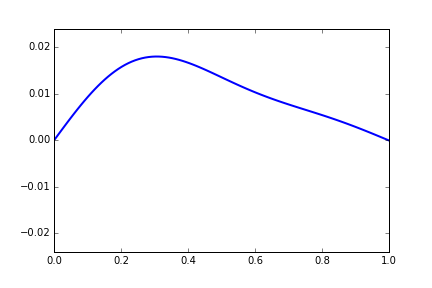
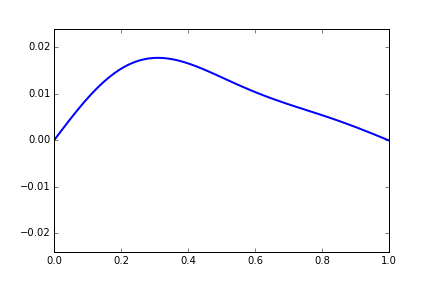
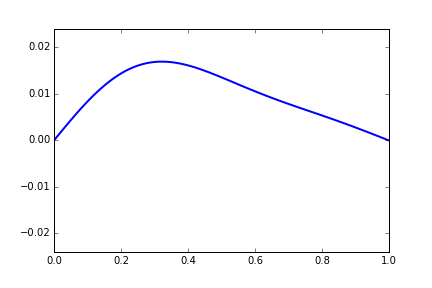
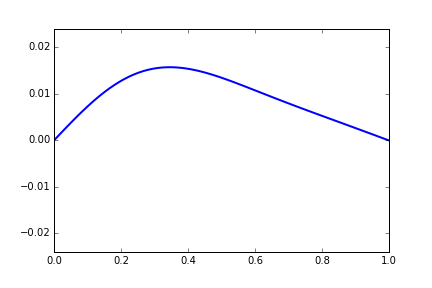
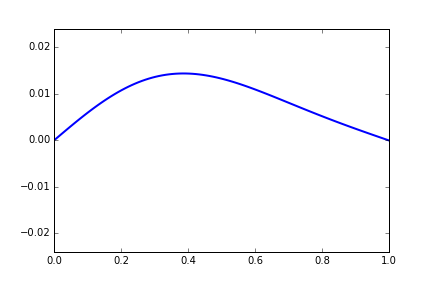
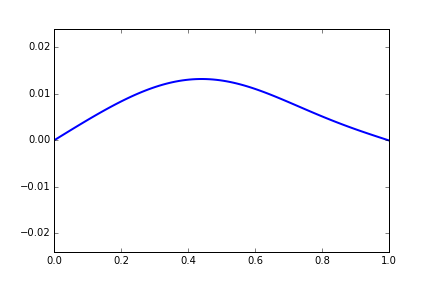
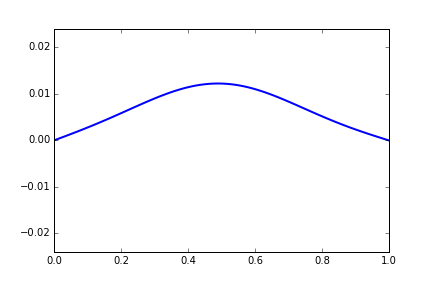
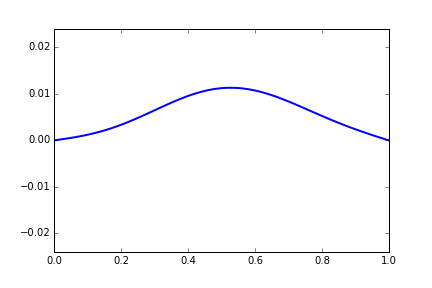
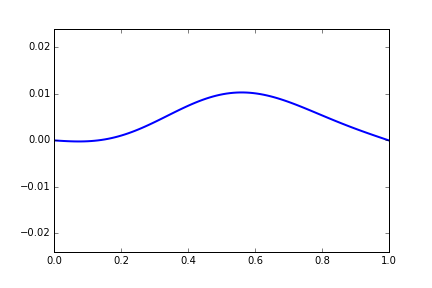
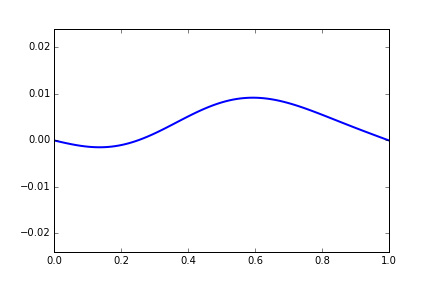
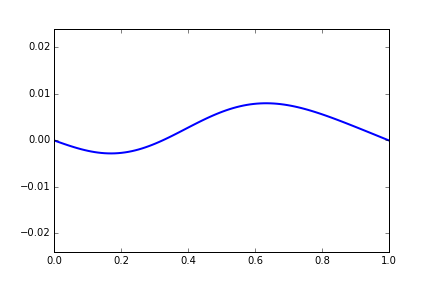
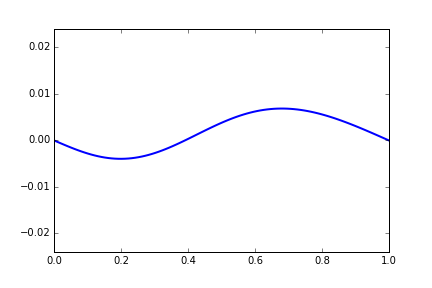
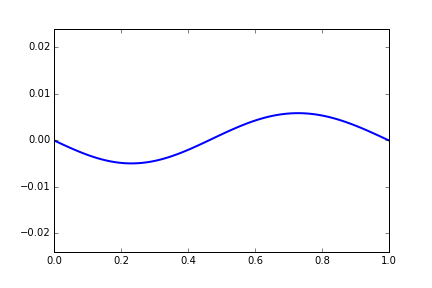
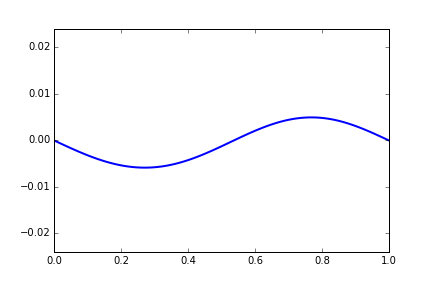
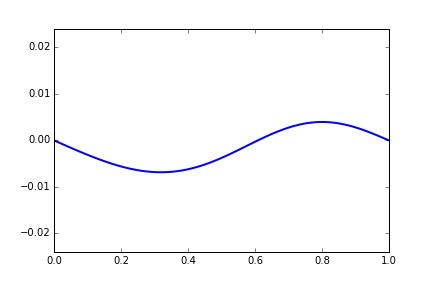
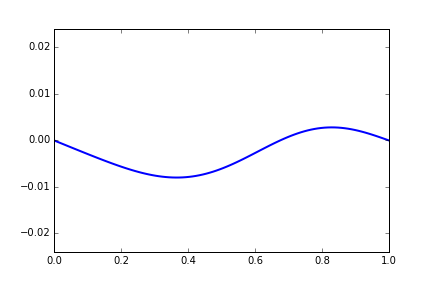
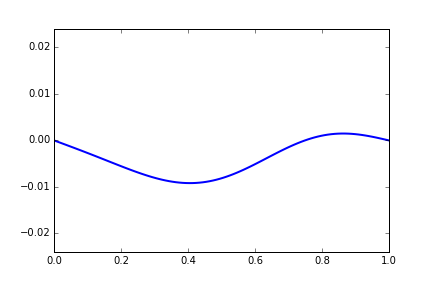
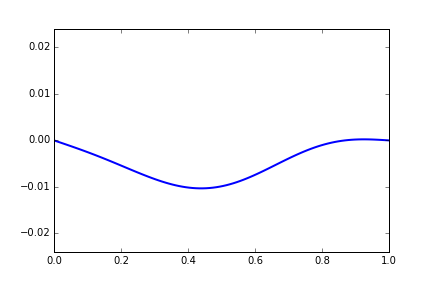
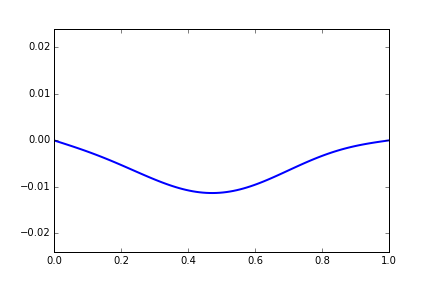
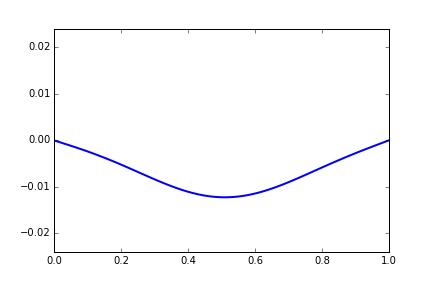
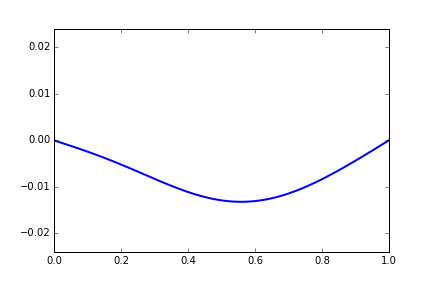
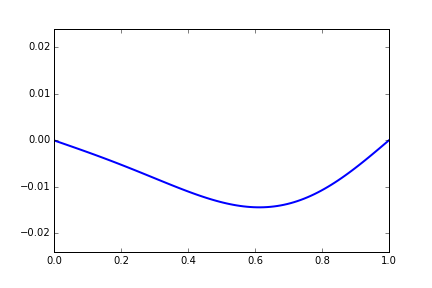
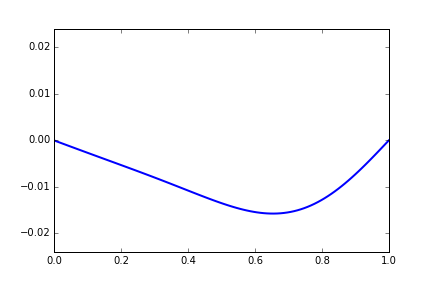
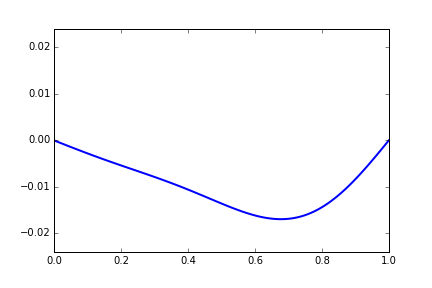
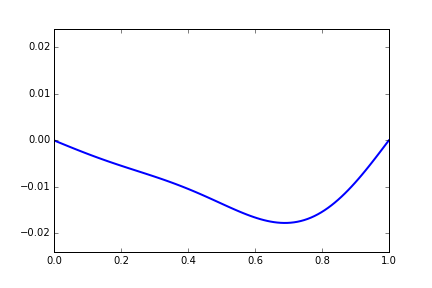
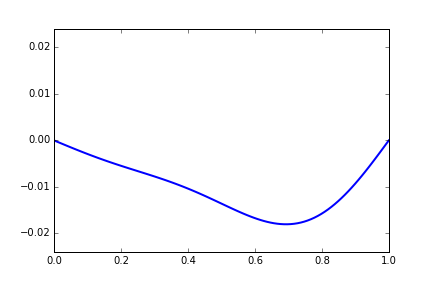
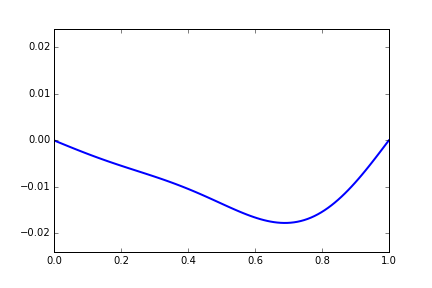
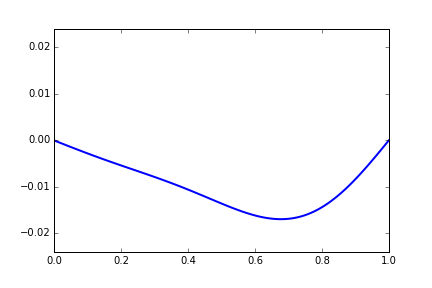
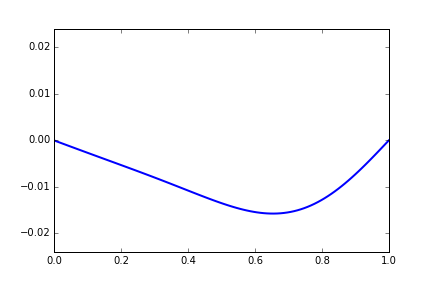
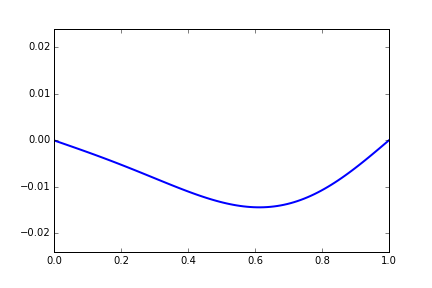
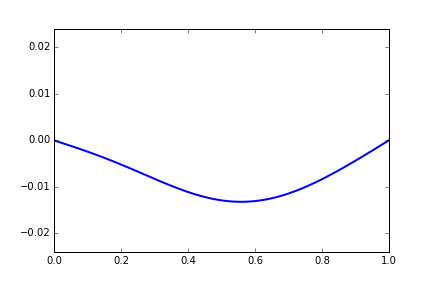
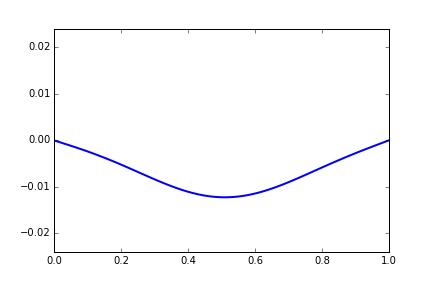
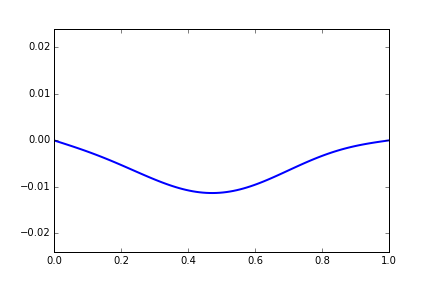
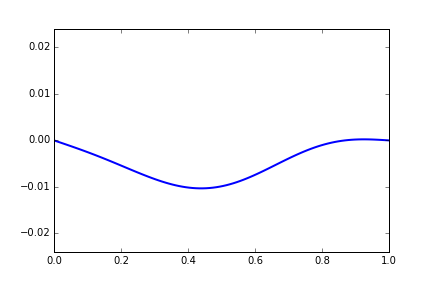
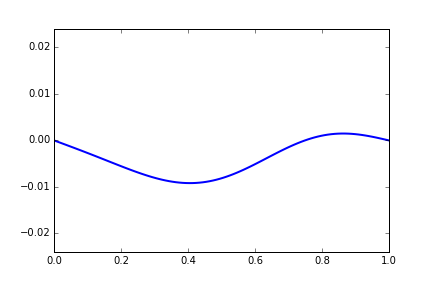
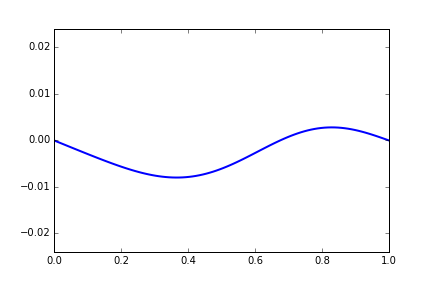
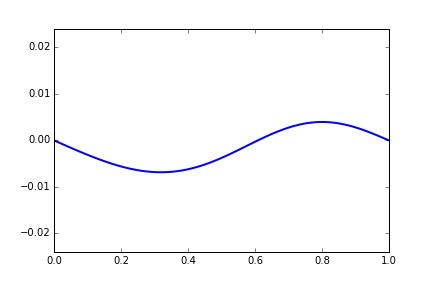
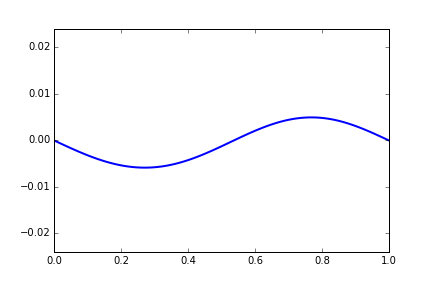
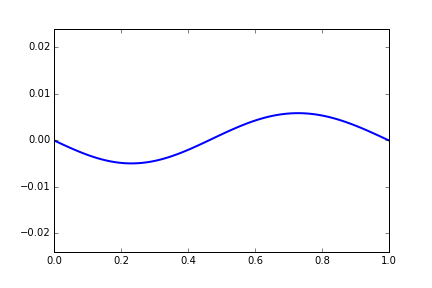
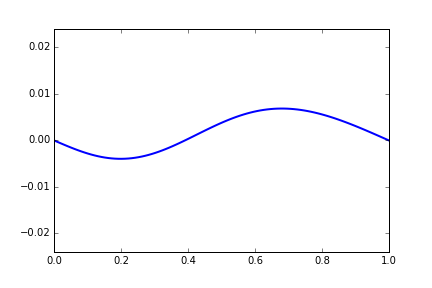
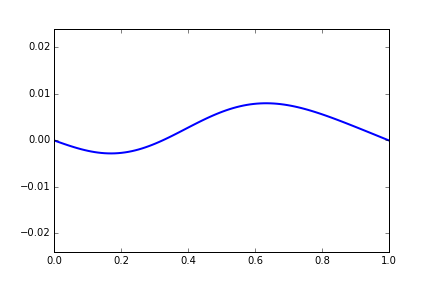
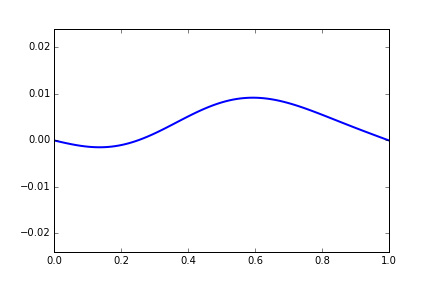
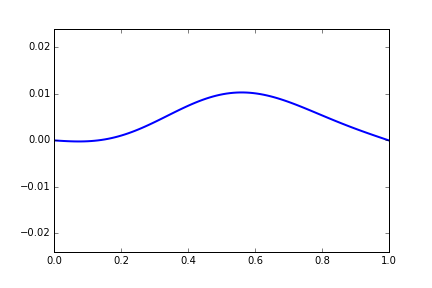
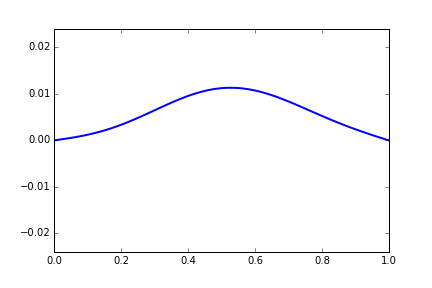
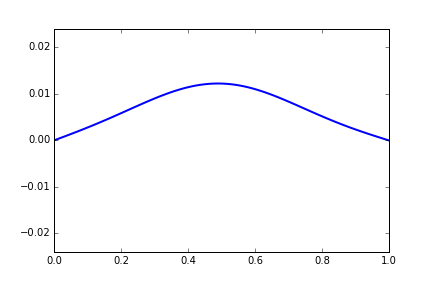
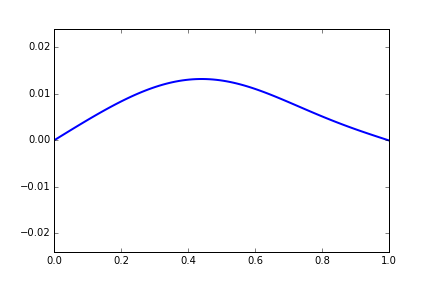
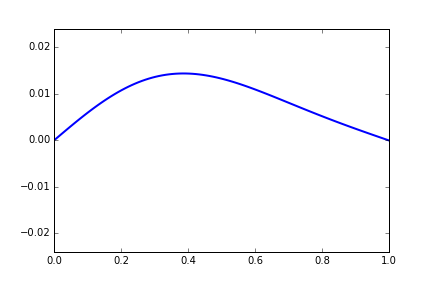
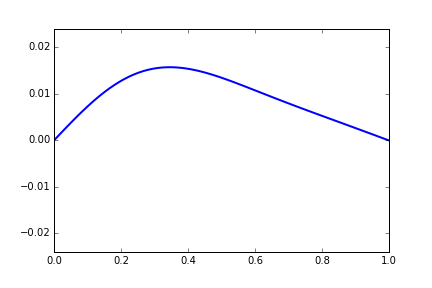
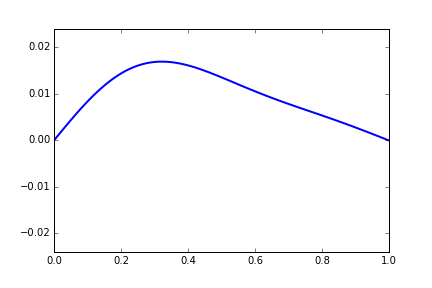
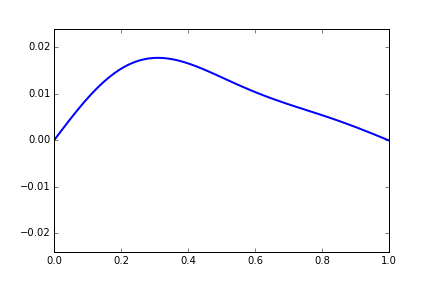
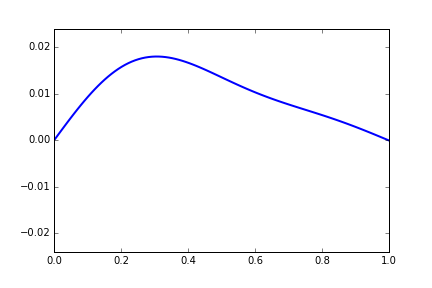
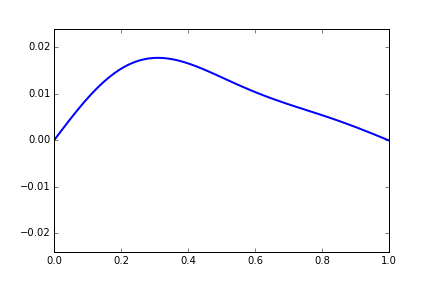
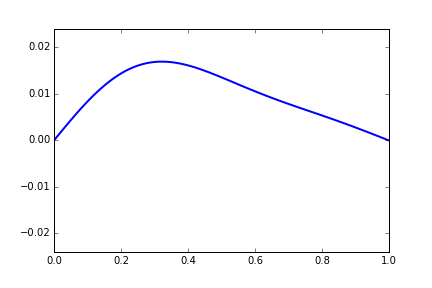
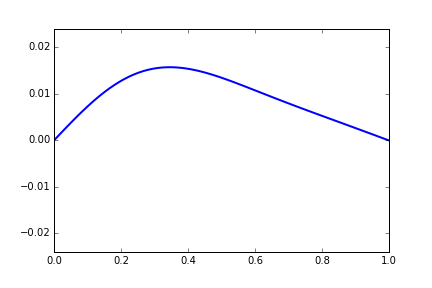
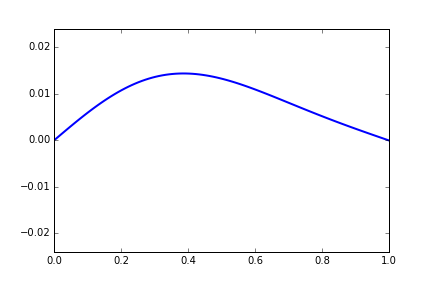
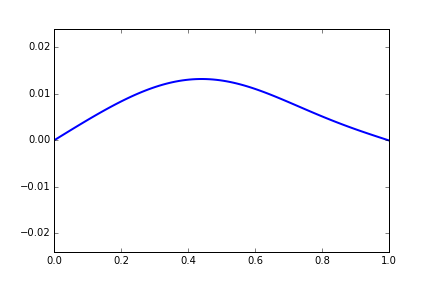
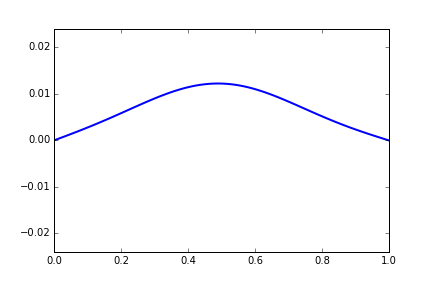
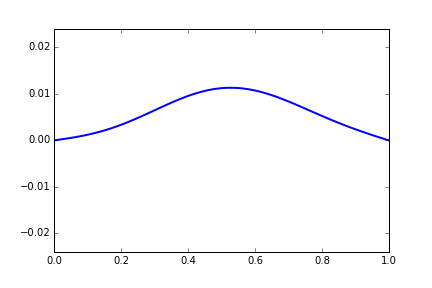
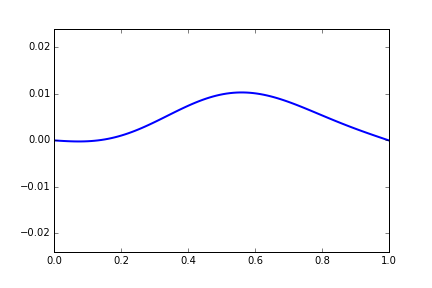
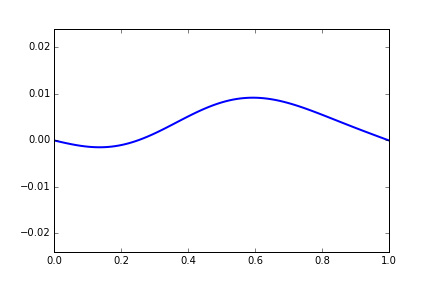
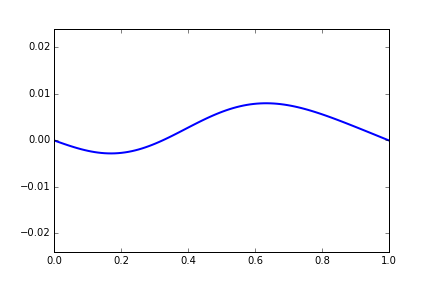
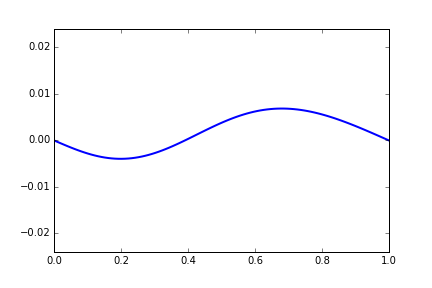
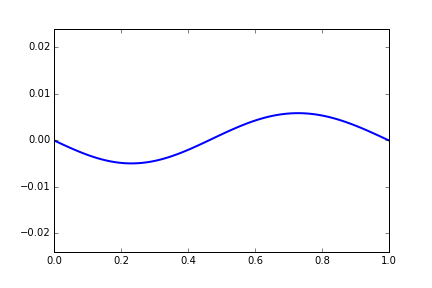
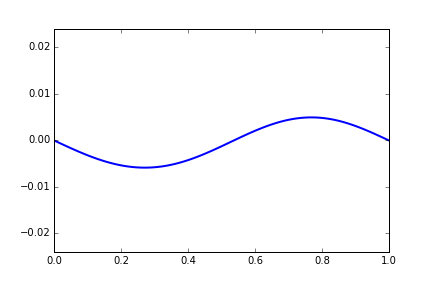
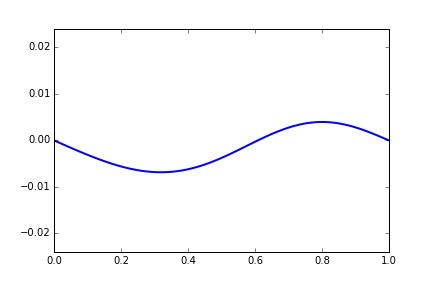
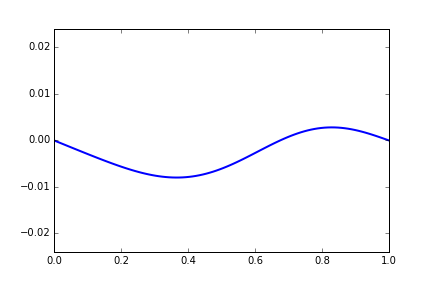
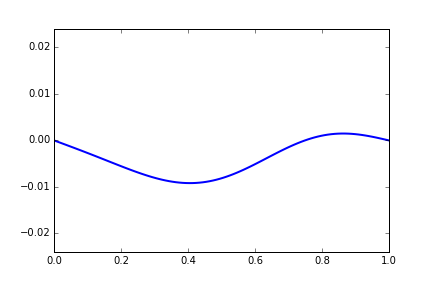
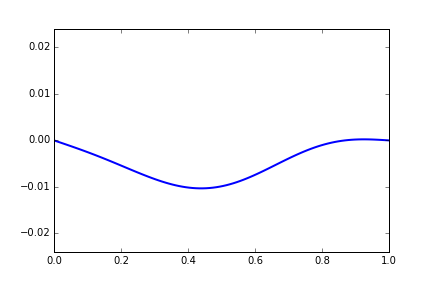
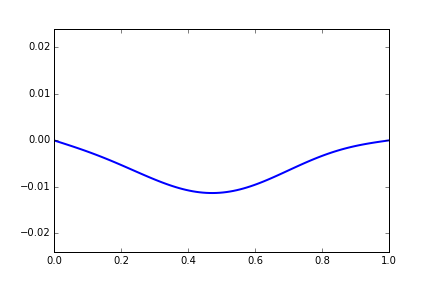
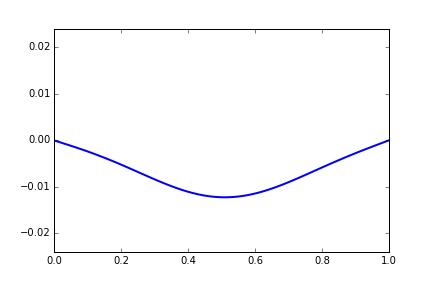
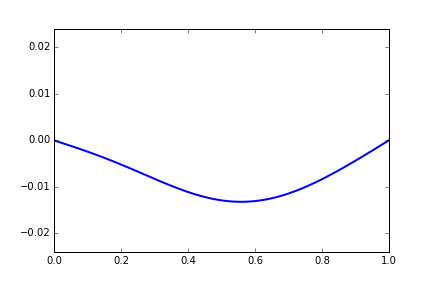
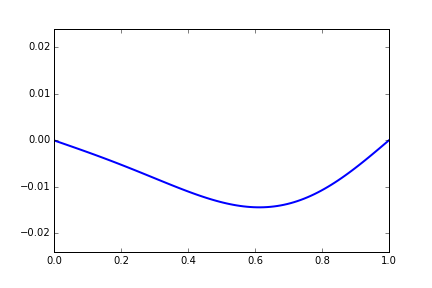
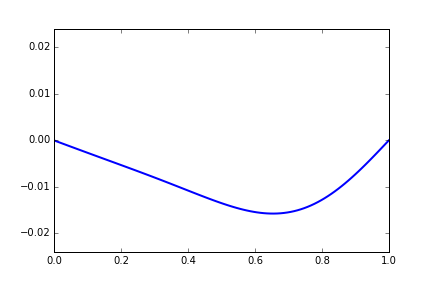
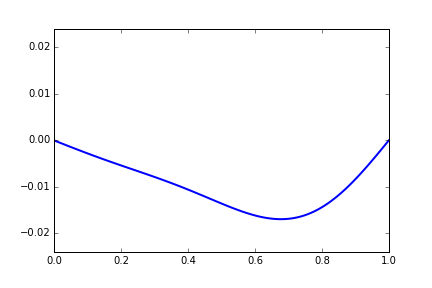
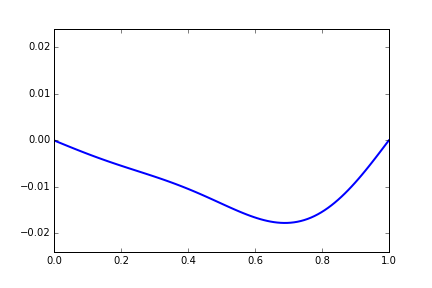
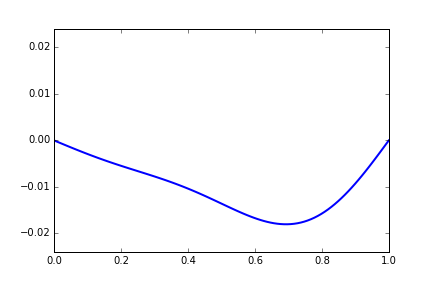
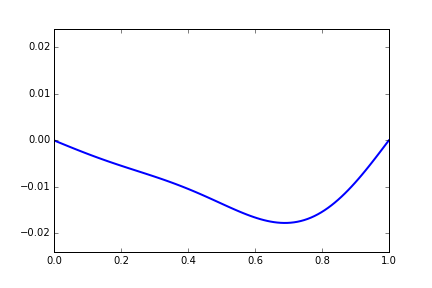
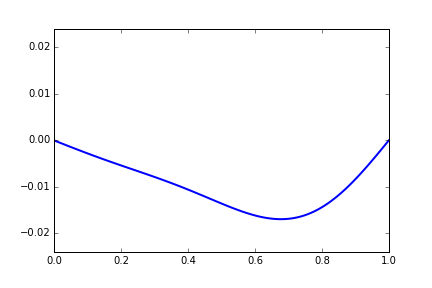
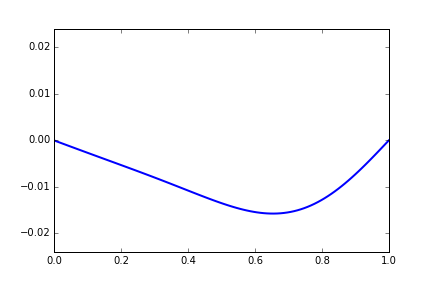
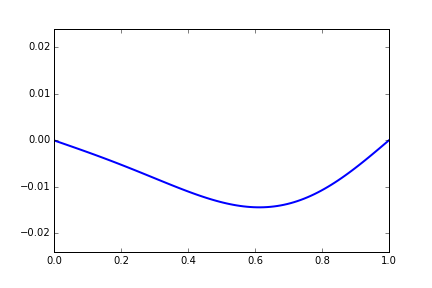
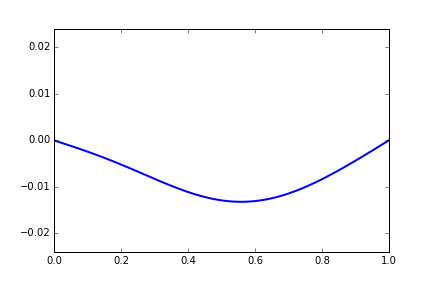
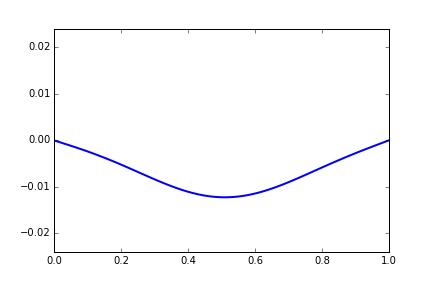
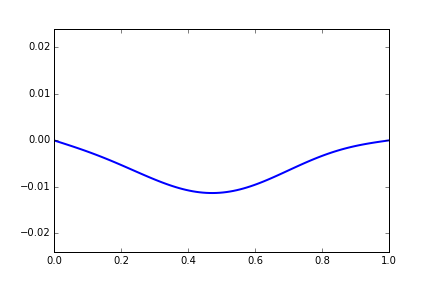
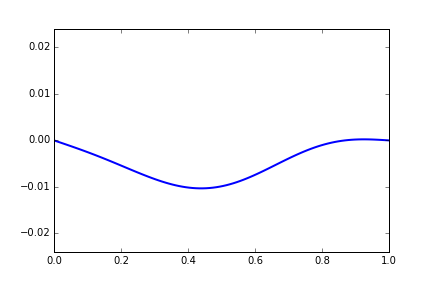
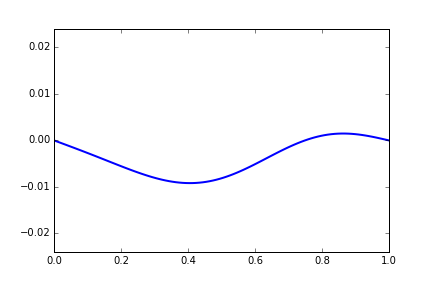
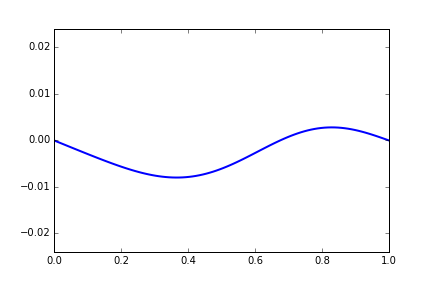
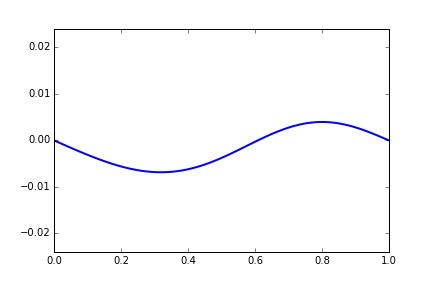
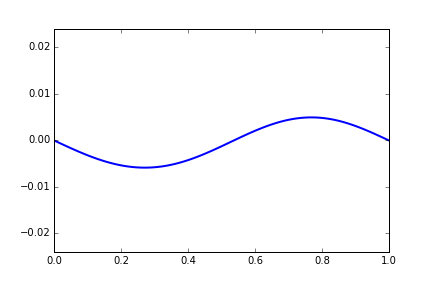
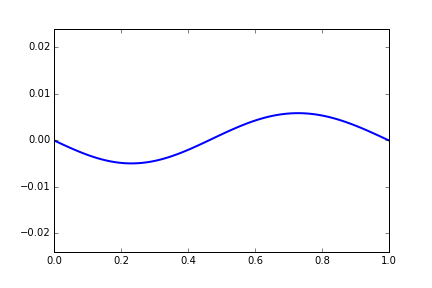
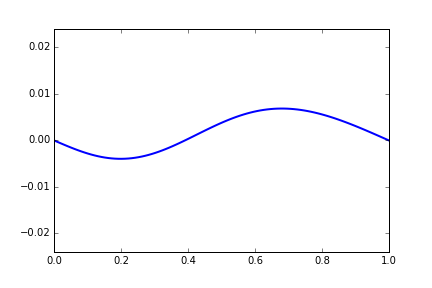
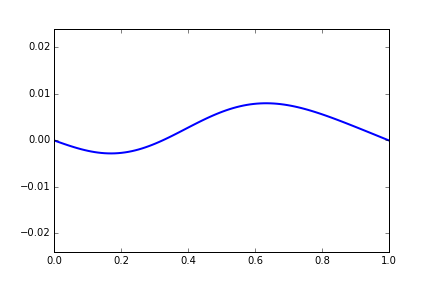
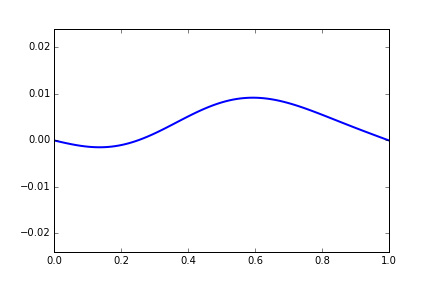
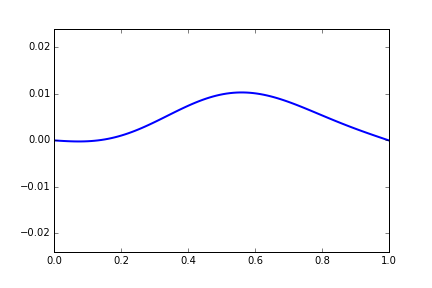
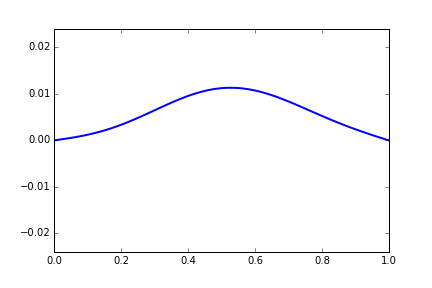
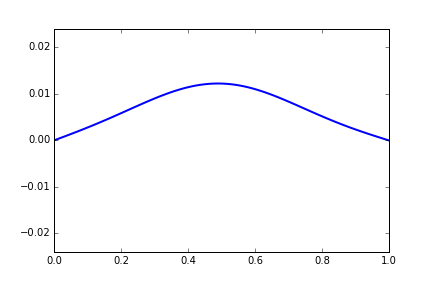
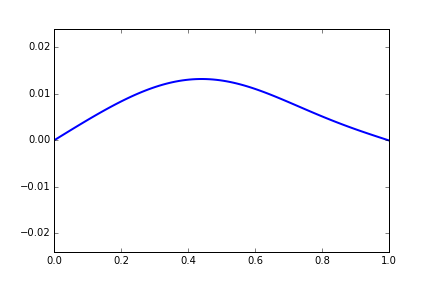
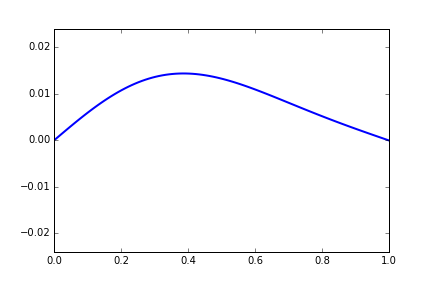
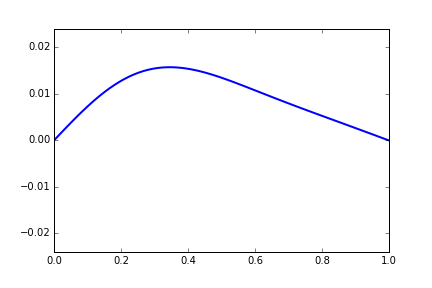
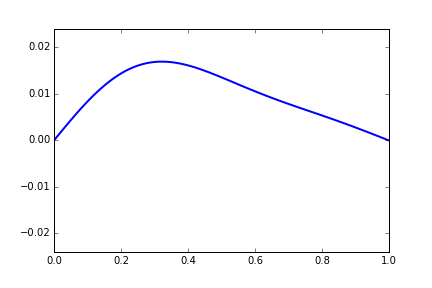
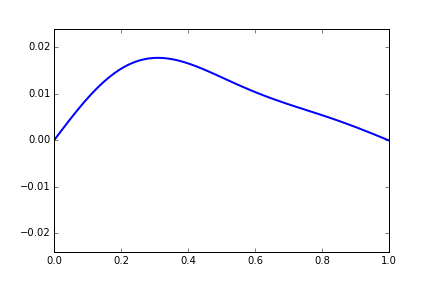

In [5]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from __future__ import division
from JSAnimation import IPython_display
from matplotlib import animation

# Animación de la solución para número de modos "m"
fig = plt.figure()
ax = plt.axes(xlim=(0, Long), ylim=(-1.2*Delta, 1.2*Delta))
line, = ax.plot([], [], lw=2)

resolucion_x = 100

x = np.linspace(0, Long, resolucion_x)
im = np.linspace(1,Nterms,Nterms).astype(int)
wm = im * np.pi / Long * np.sqrt(Tens/Rho)

coef = 32.* Delta / (3. * np.pi**2.)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    y = np.zeros(resolucion_x)
    for m in im:
        y += coef / m**2 * np.sin( m * np.pi/4 ) * np.sin(m * np.pi * x /Long)* np.cos( wm[m-1] * t[i])          
    line.set_data(x, y)
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(t), interval=20, blit=True) # interval = 20 milisegundos
                        

Se observa que para $t=0$ la función es "suave". La forma inicial no está del todo bien representada. 

Para representar dos trozos de recta mediante una serie trigonométrica se necesitan más términos. 

## Solución con 10 términos


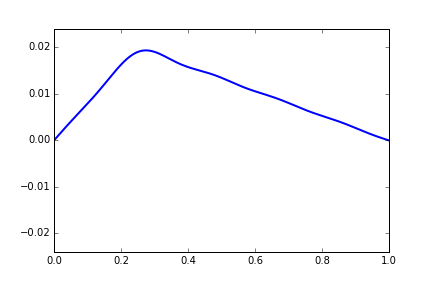
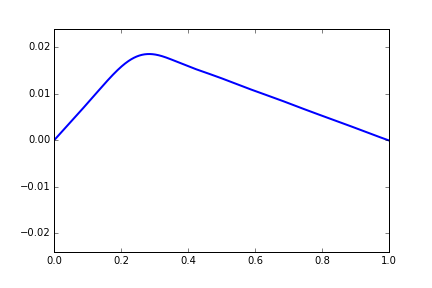
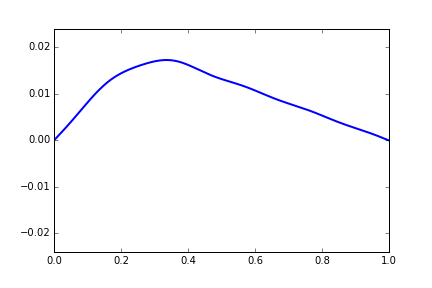
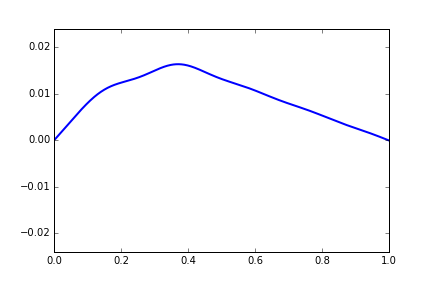
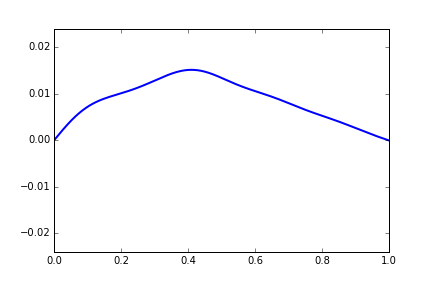
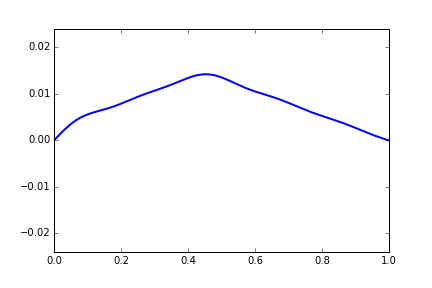
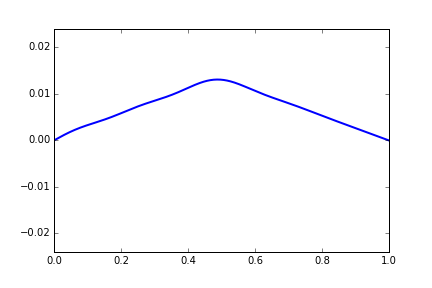
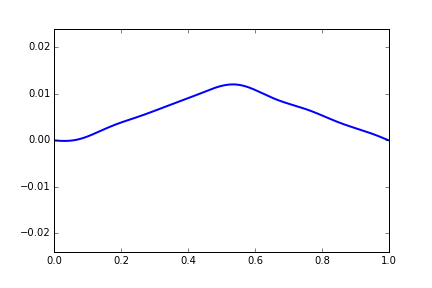
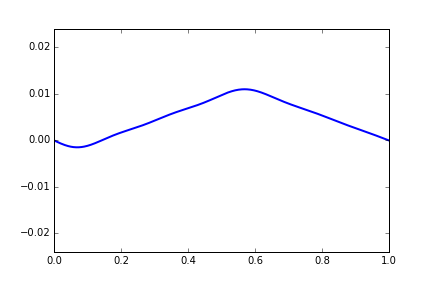
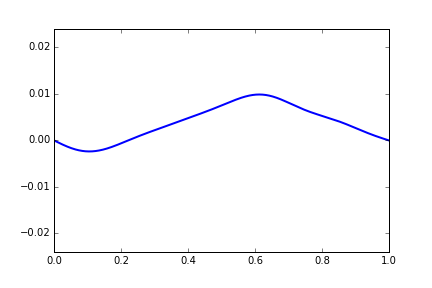
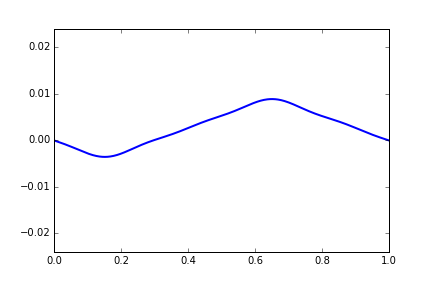
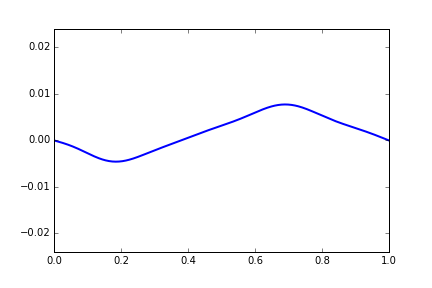
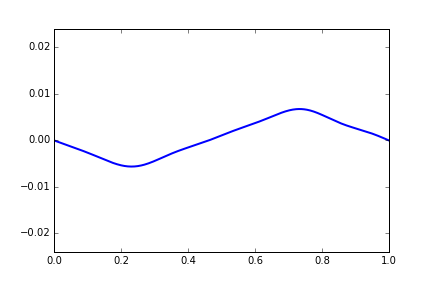
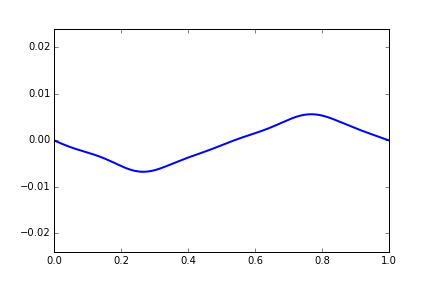
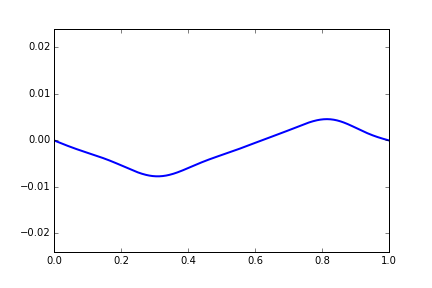
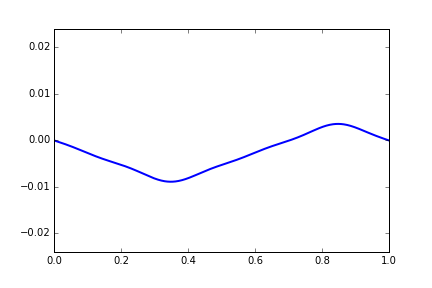
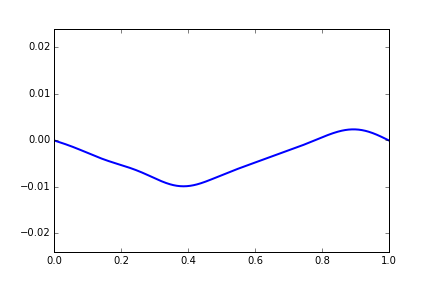
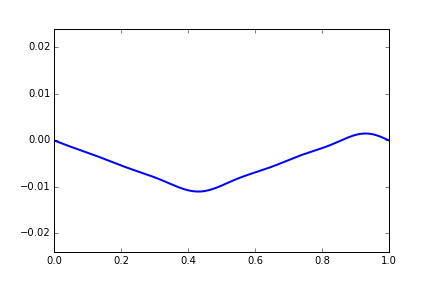
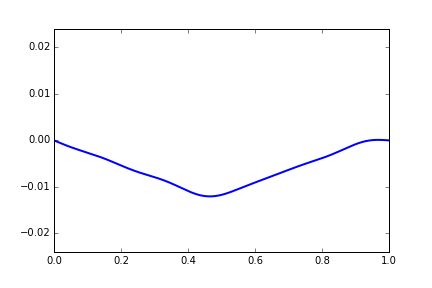
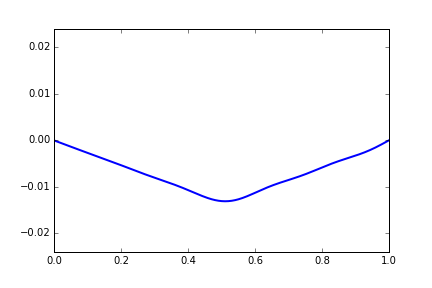
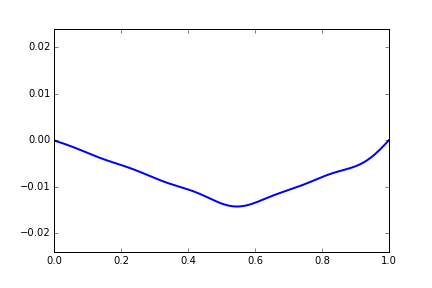
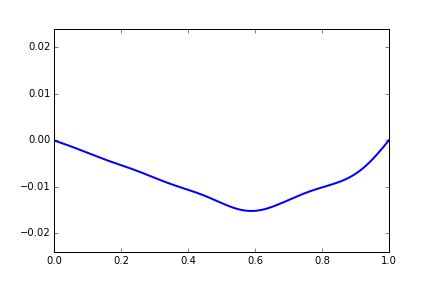
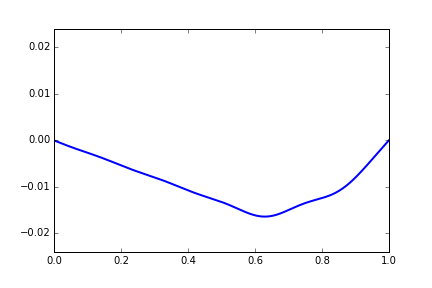
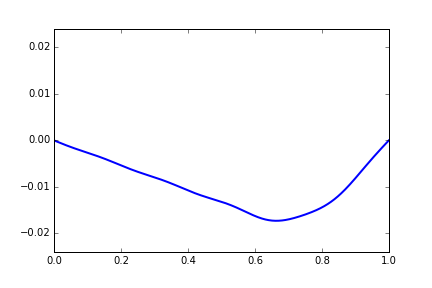
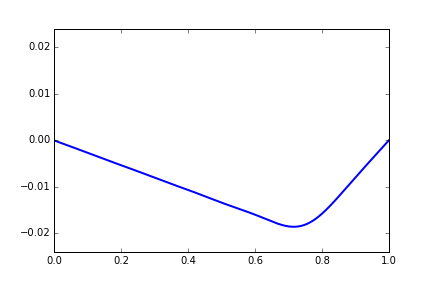
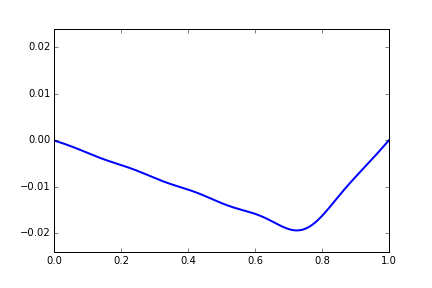
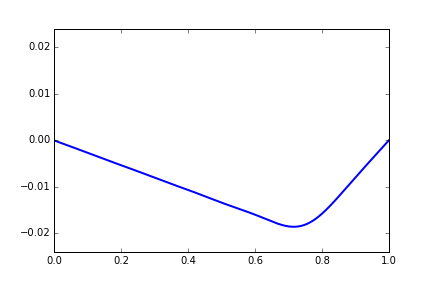
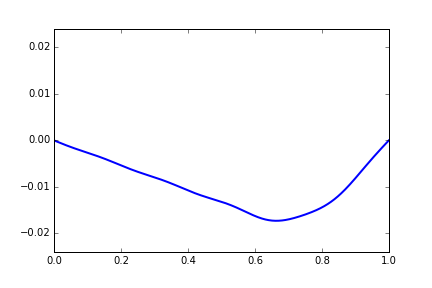
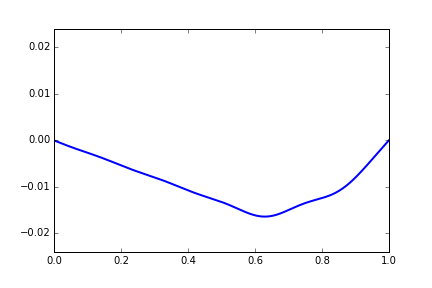
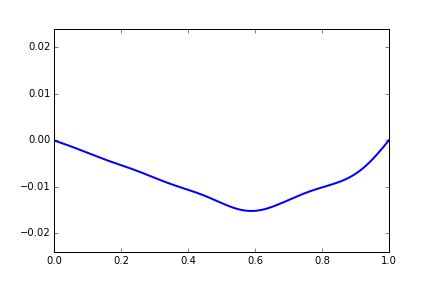
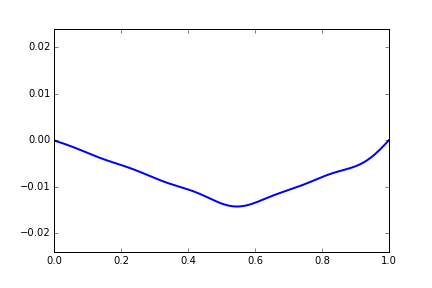
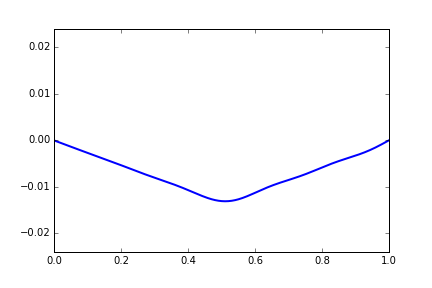
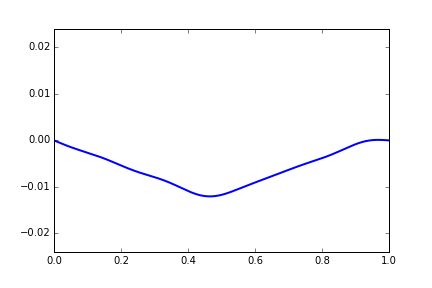
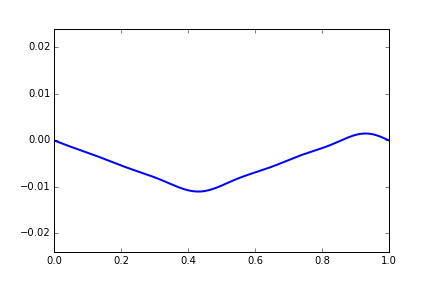
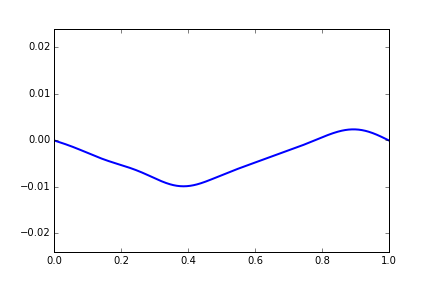
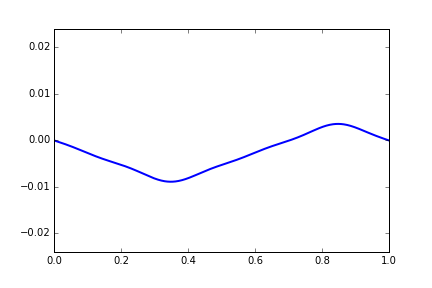
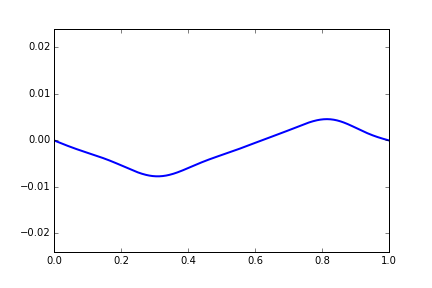
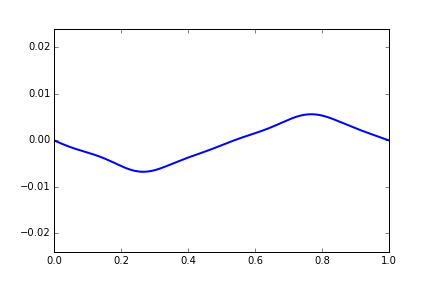
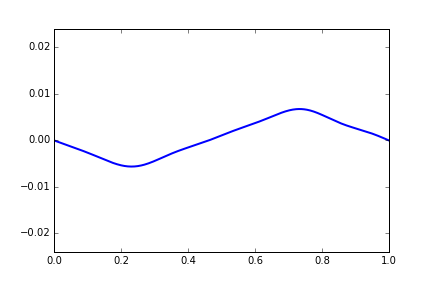
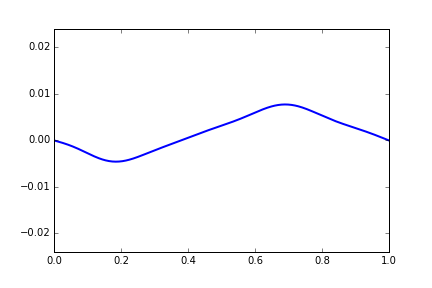
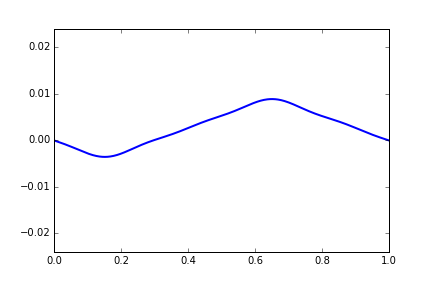
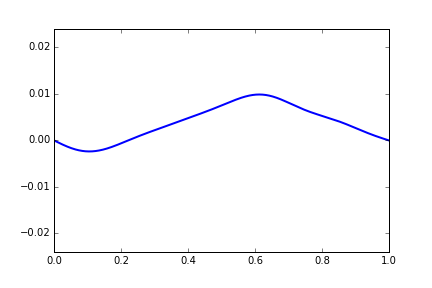
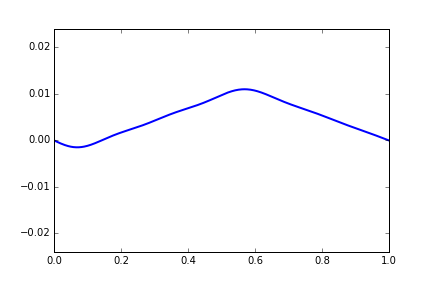
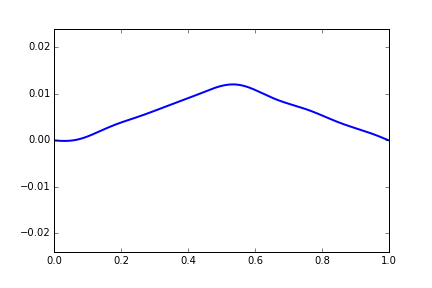
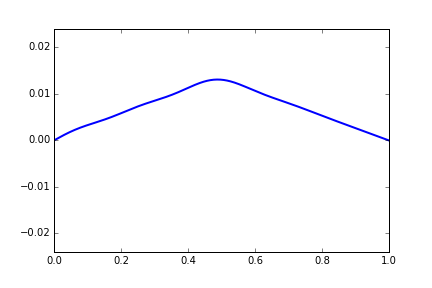
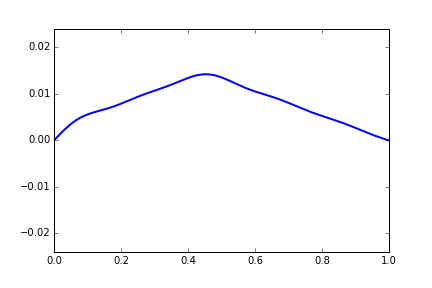
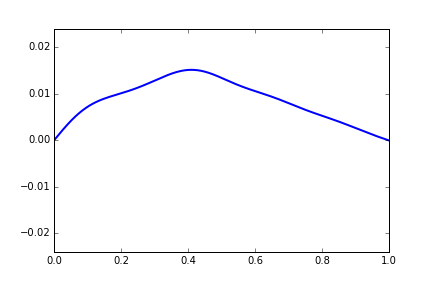
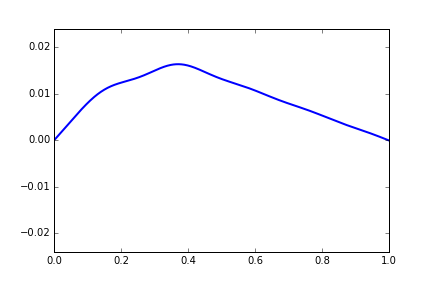
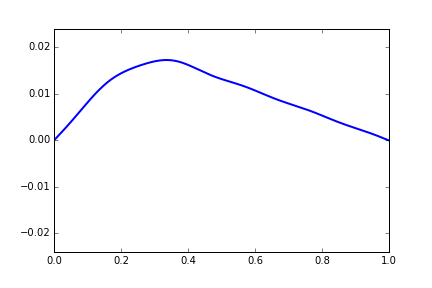
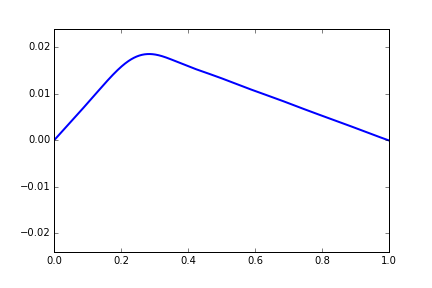
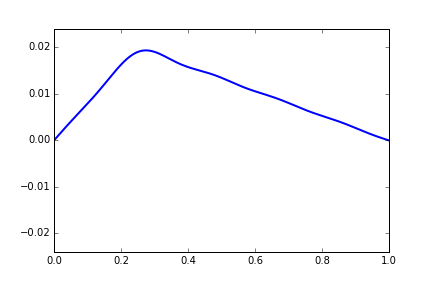
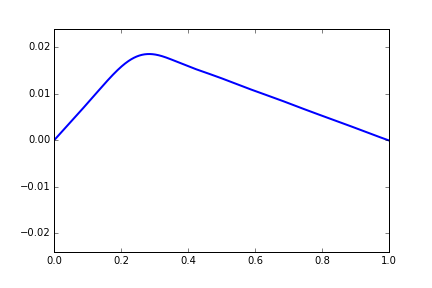
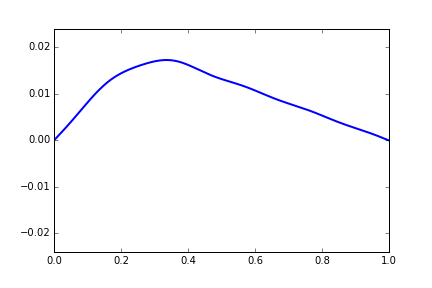
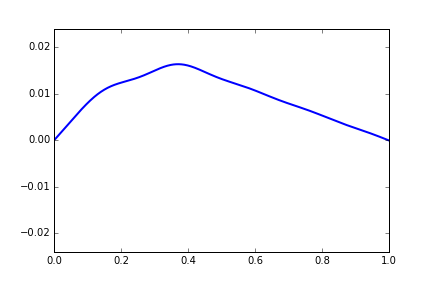
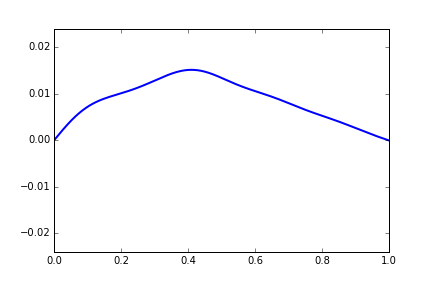
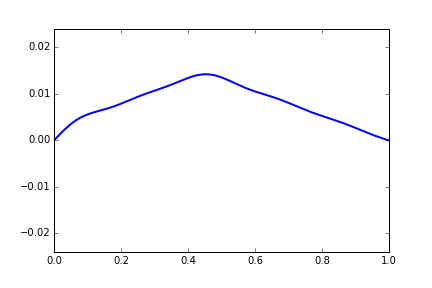
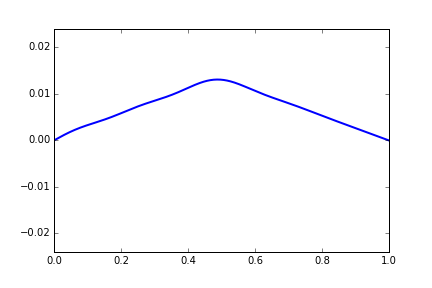
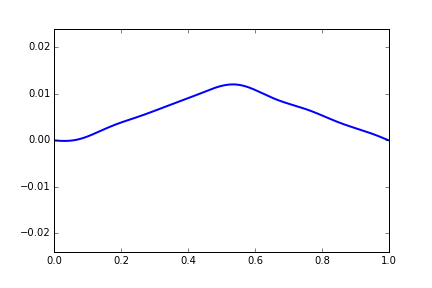
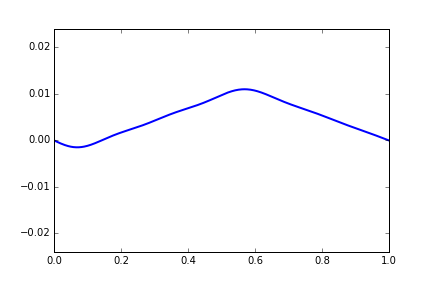
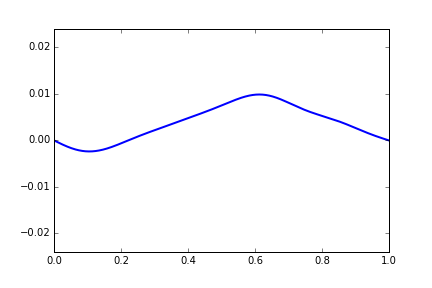
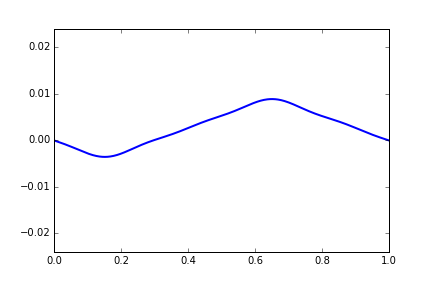
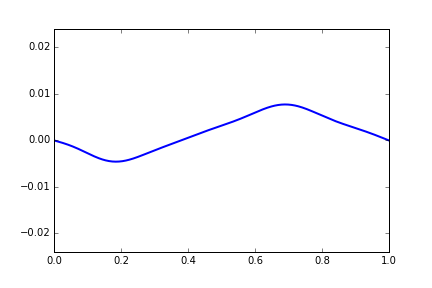
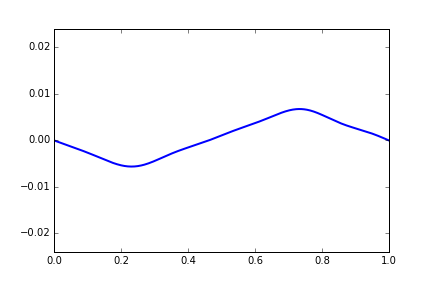
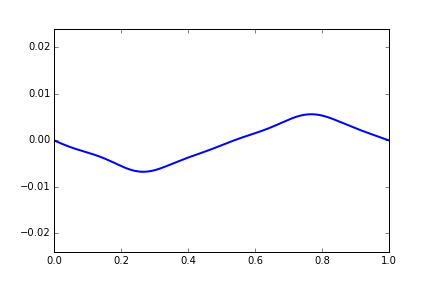
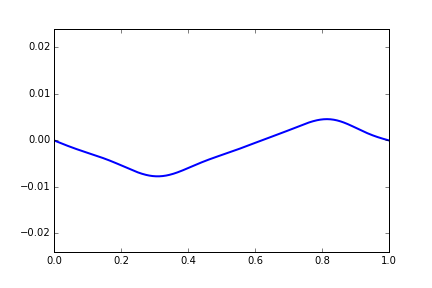
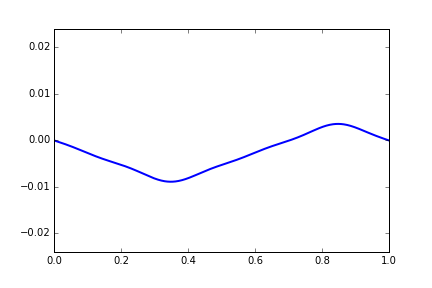
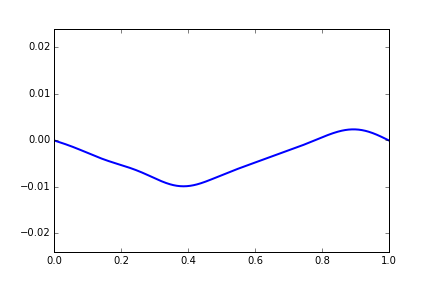
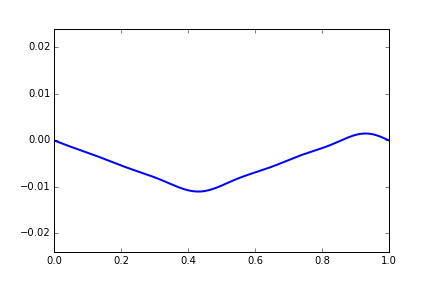
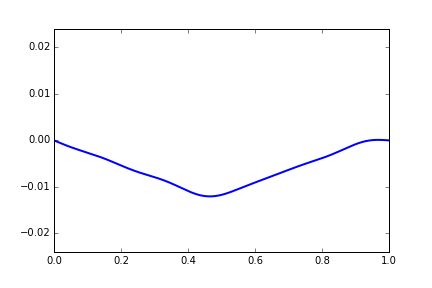
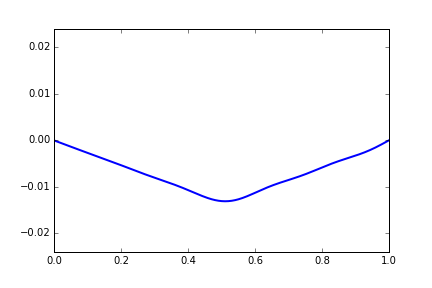
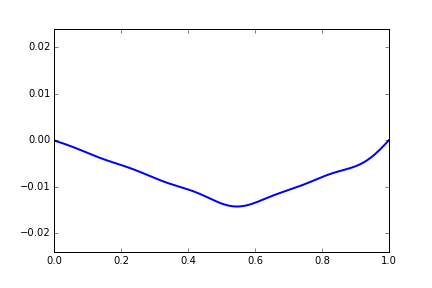
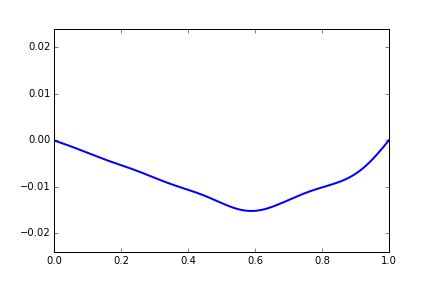
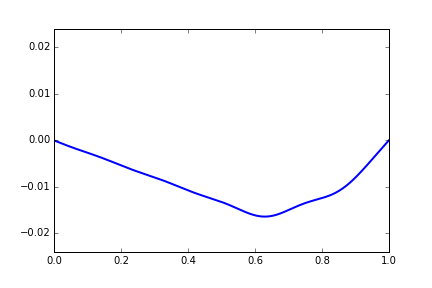
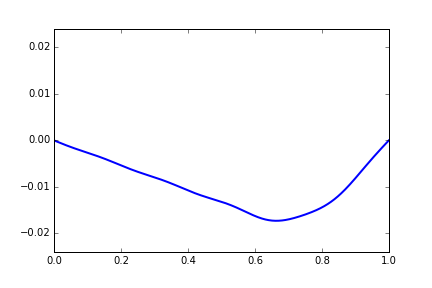
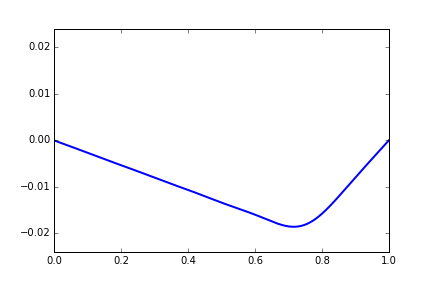
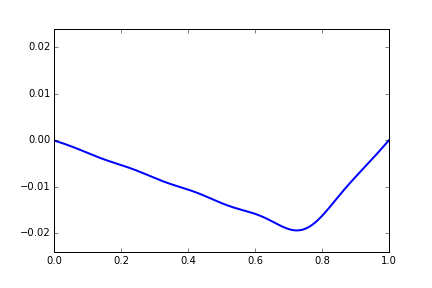
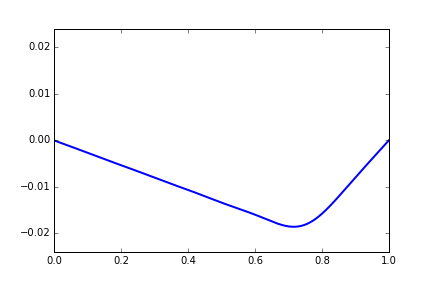
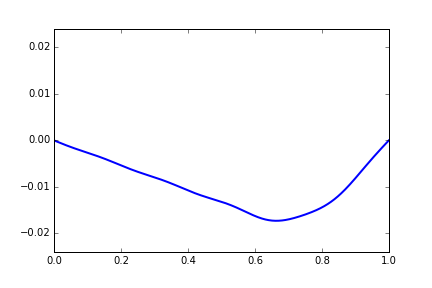
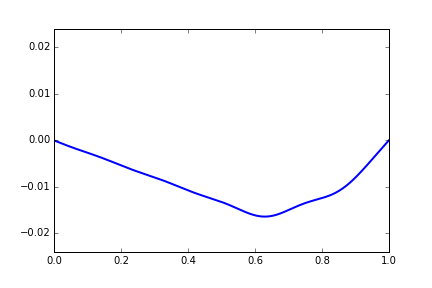
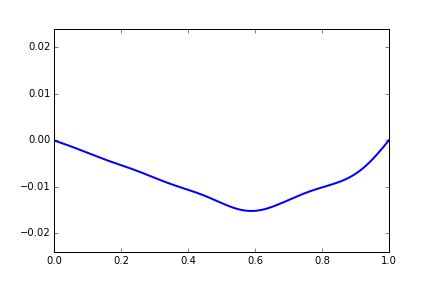
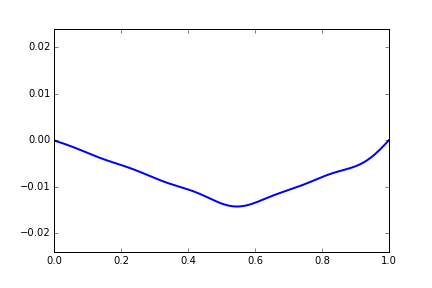
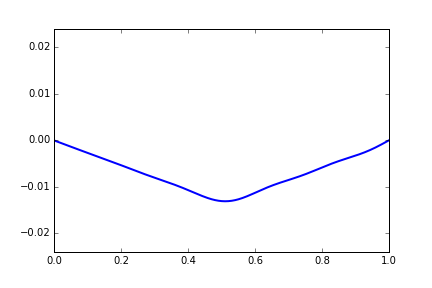
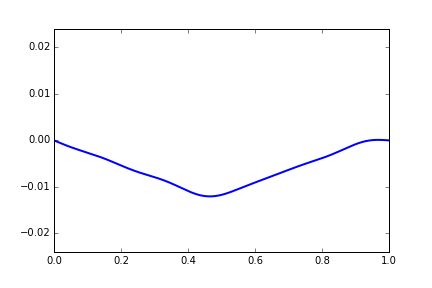
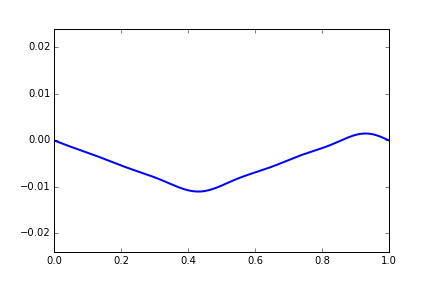
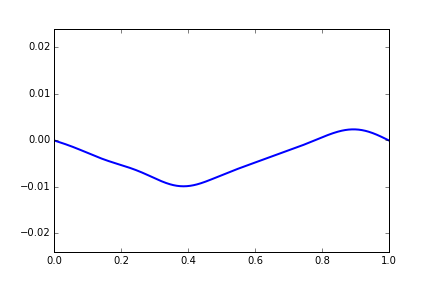
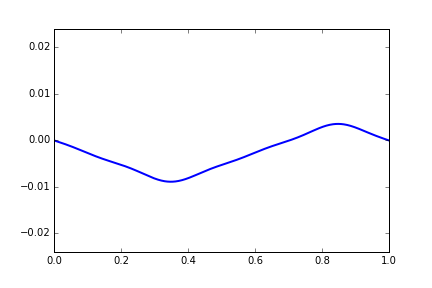
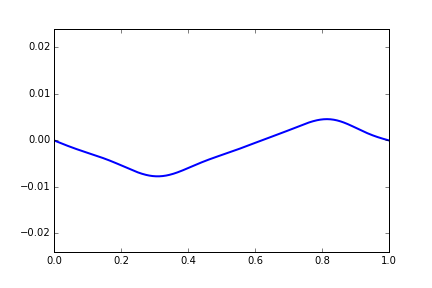
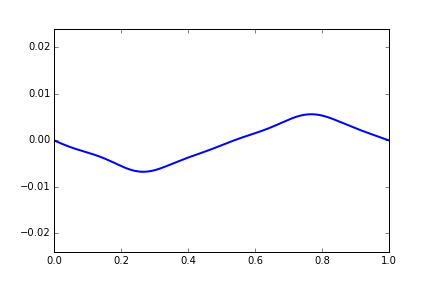
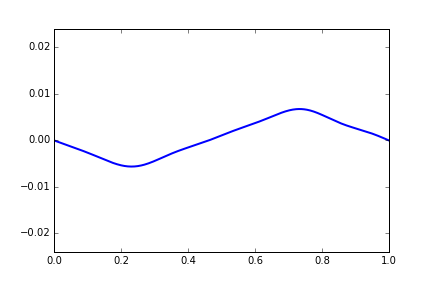
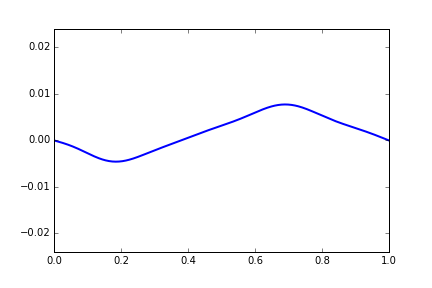
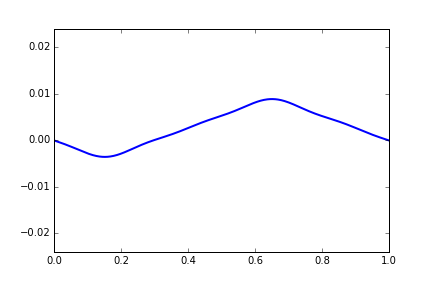
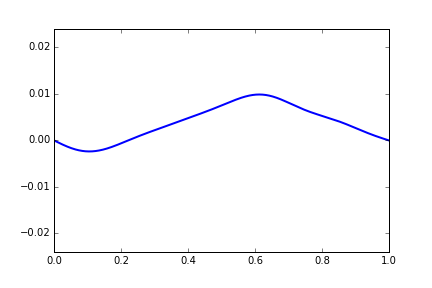
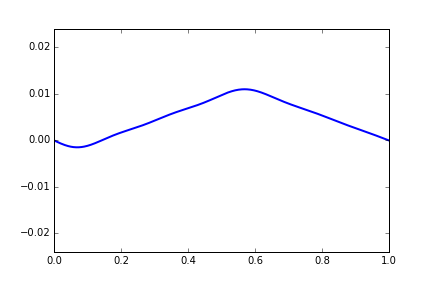
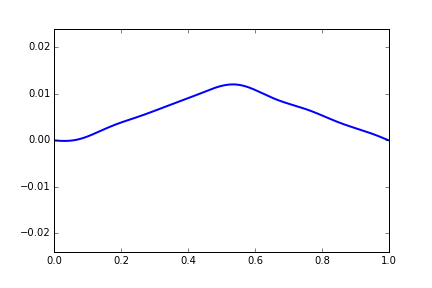
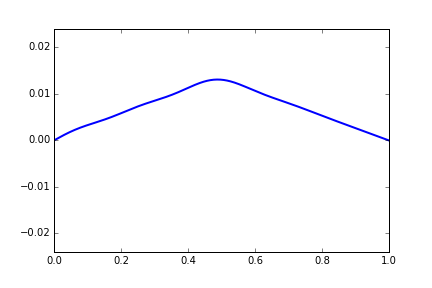
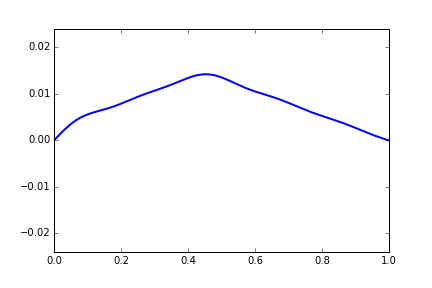
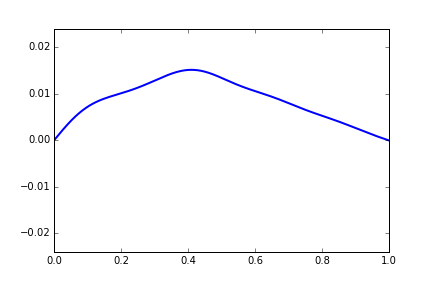
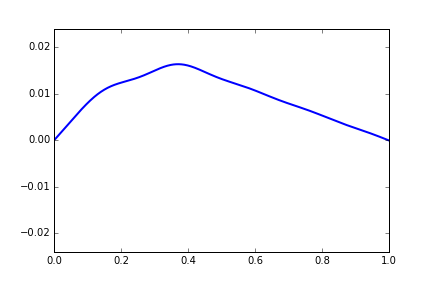
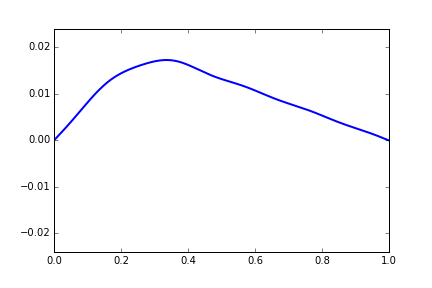
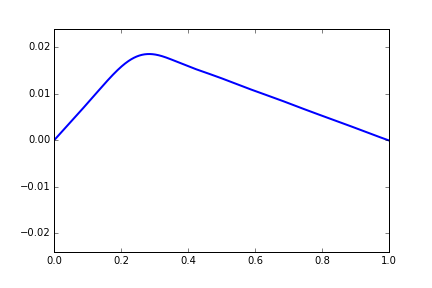

In [6]:
Nterms = 10

im = np.linspace(1,Nterms,Nterms).astype(int)

wm = im * np.pi / Long * np.sqrt(Tens/Rho)


fig = plt.figure()

ax = plt.axes(xlim=(0, Long), ylim=(-1.2*Delta, 1.2*Delta))

line, = ax.plot([], [], lw=2)

resolucion_x = 500

x = np.linspace(0, Long, resolucion_x)

im = np.linspace(1,Nterms,Nterms).astype(int)

wm = im * np.pi / Long * np.sqrt(Tens/Rho)

coef = 32.* Delta / (3. * np.pi**2.)

animation.FuncAnimation(fig, animate, init_func=init,

                        frames=100, interval=20, blit=True)

Se observa que con 10 términos, la serie representa mejor las condiciones iniciales, si bien continúa existiendo falta de definición en la abscisa L/4. 

## Solución con 100 términos


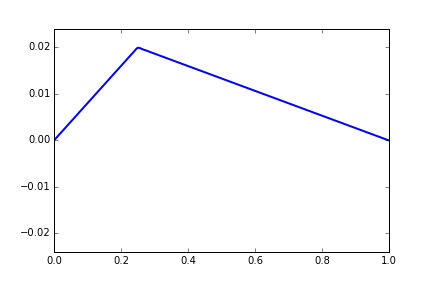
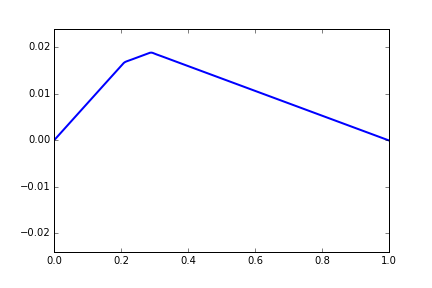
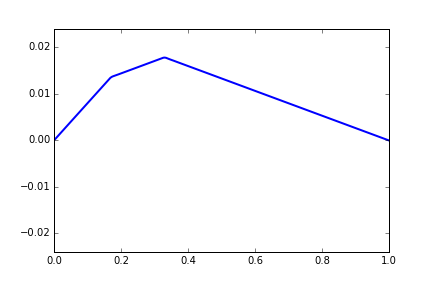
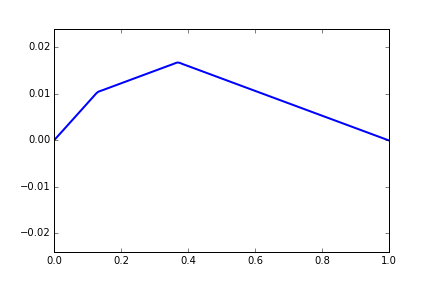
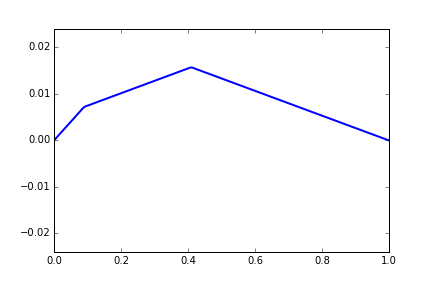
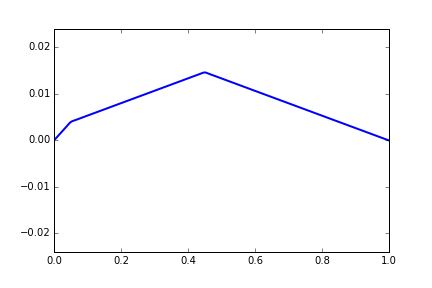
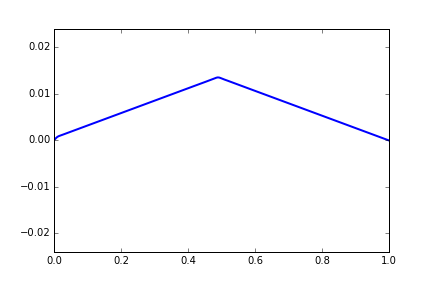
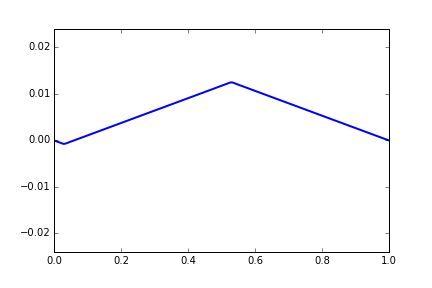
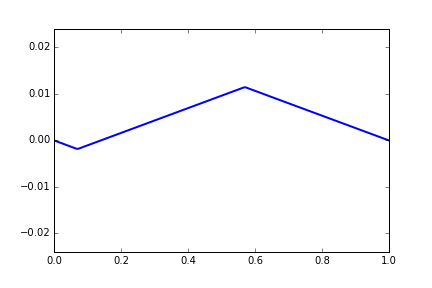
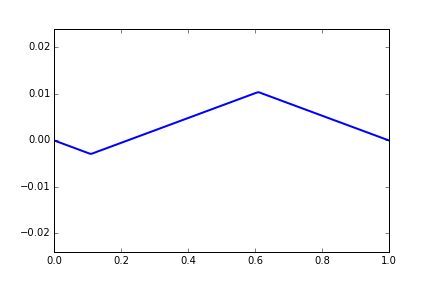
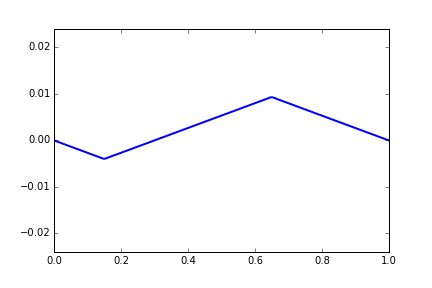
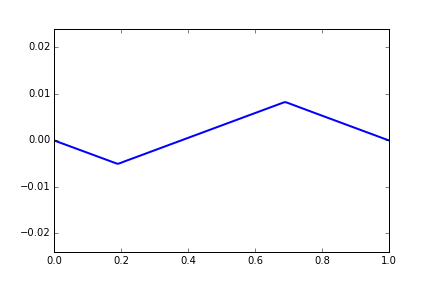
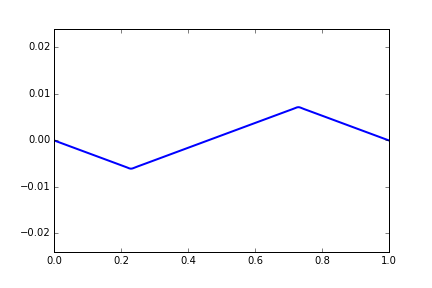
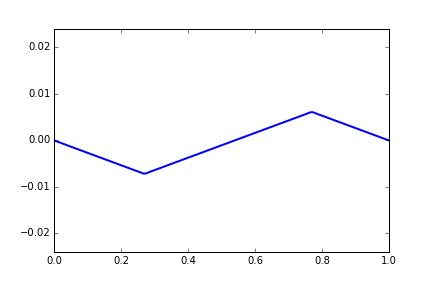
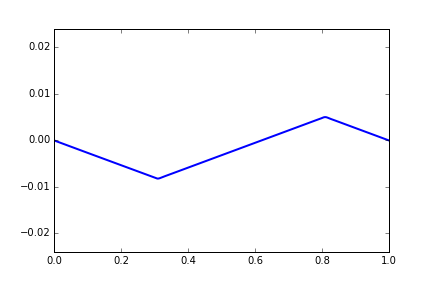
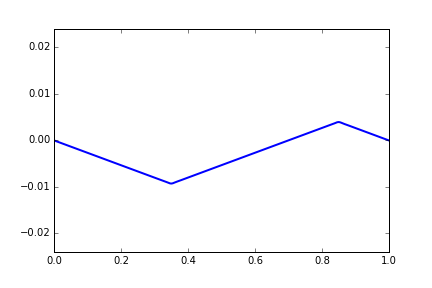
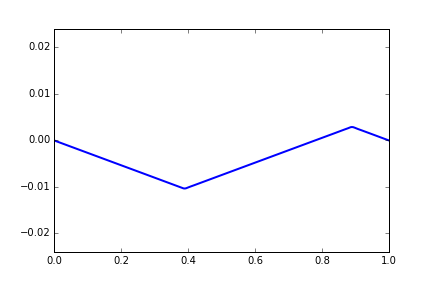
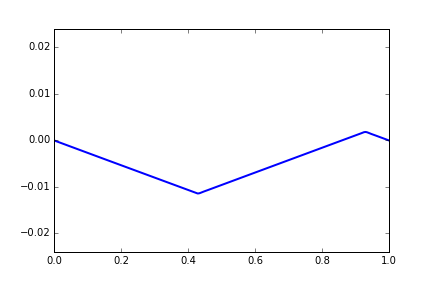
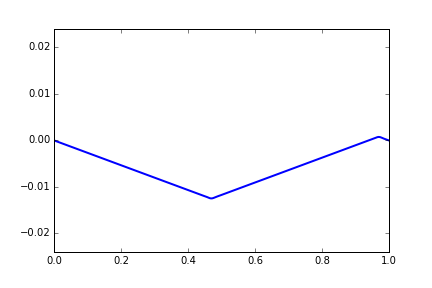
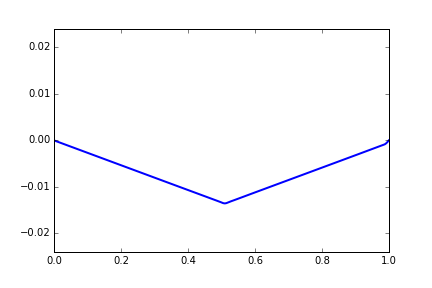
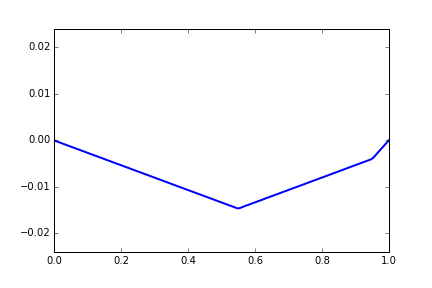
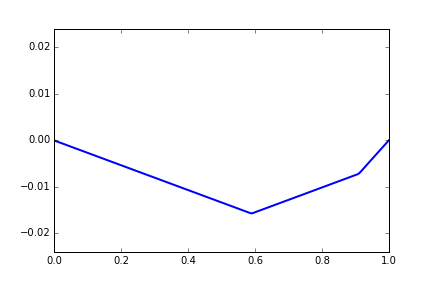
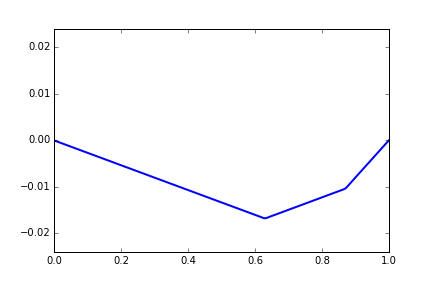
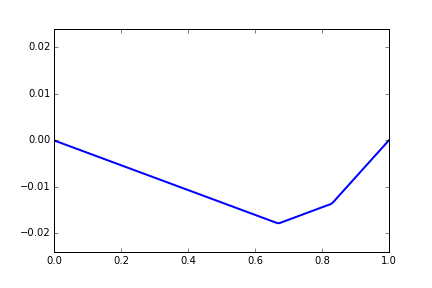
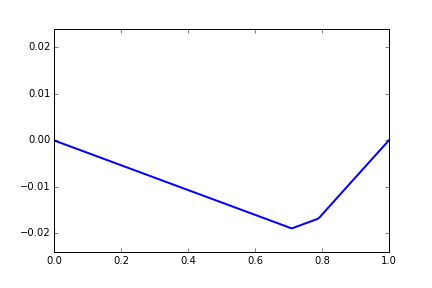
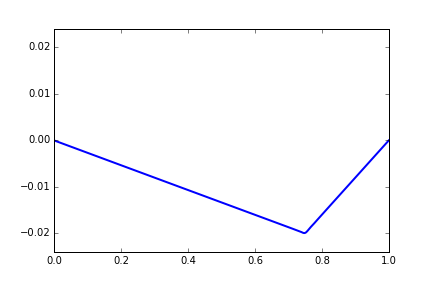
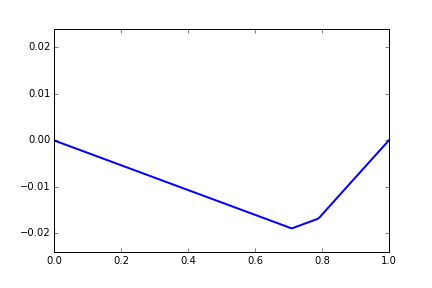
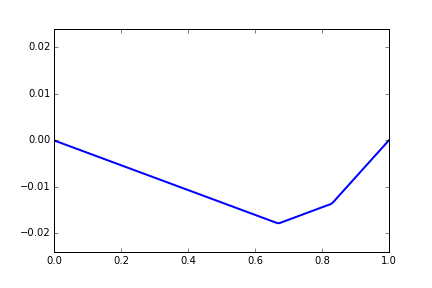
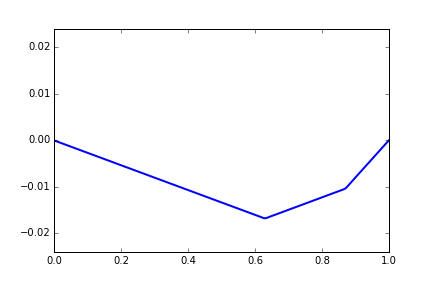
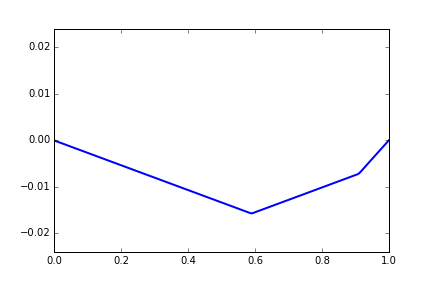
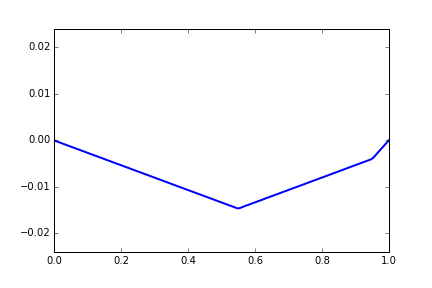
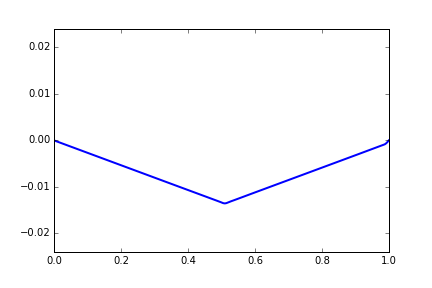
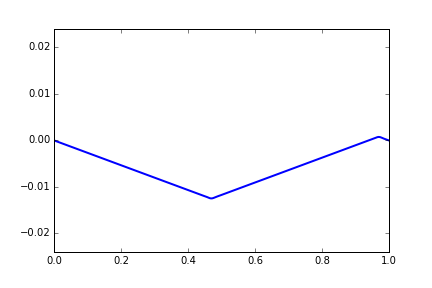
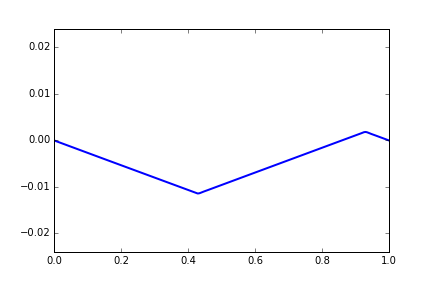
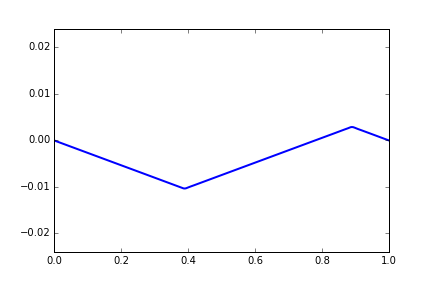
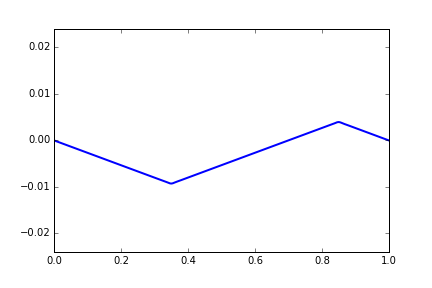
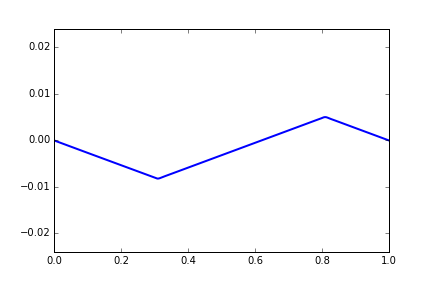
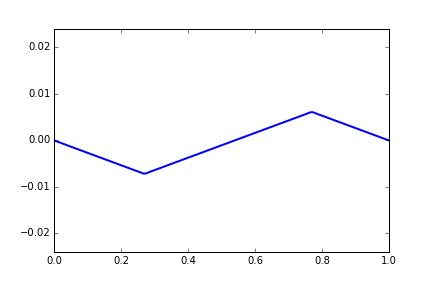
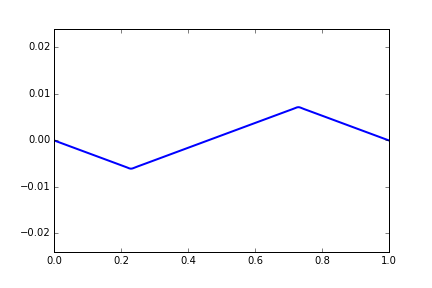
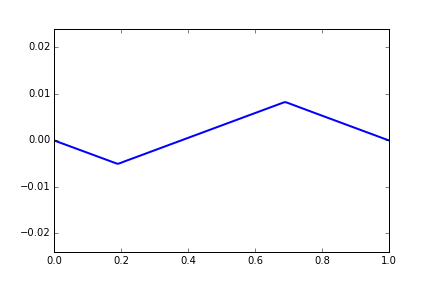
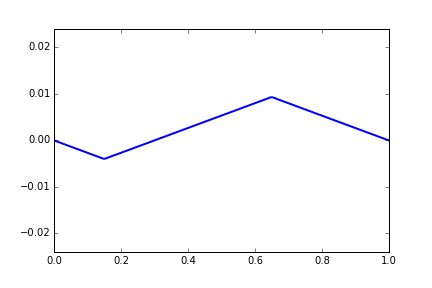
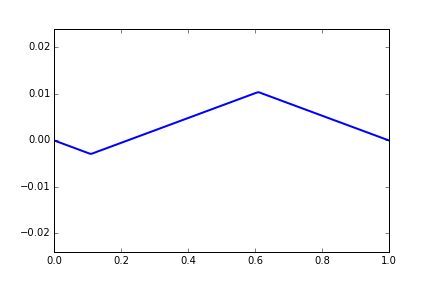
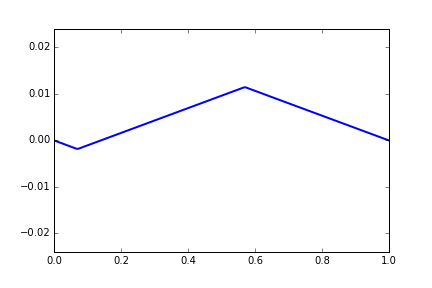
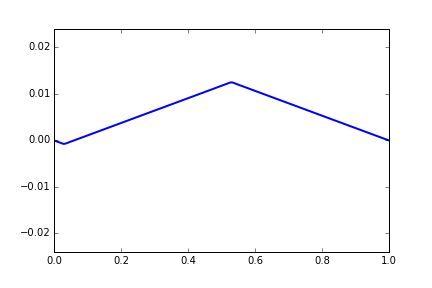
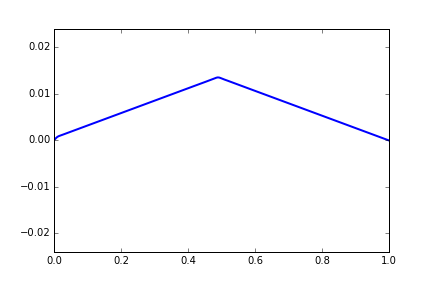
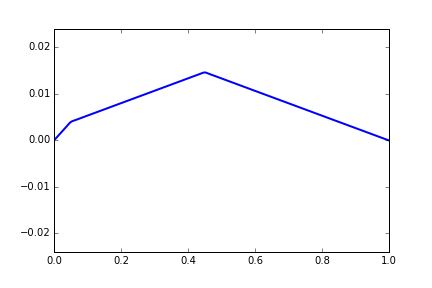
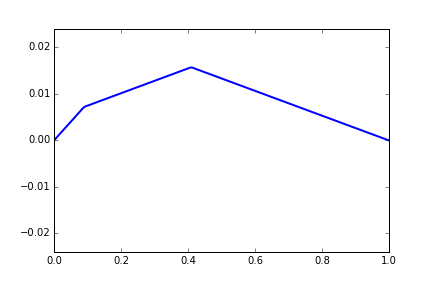
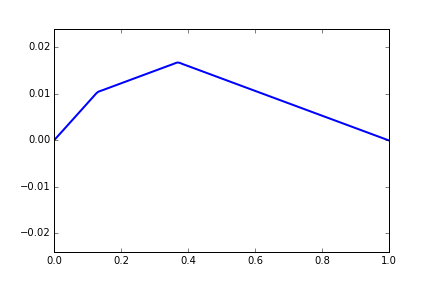
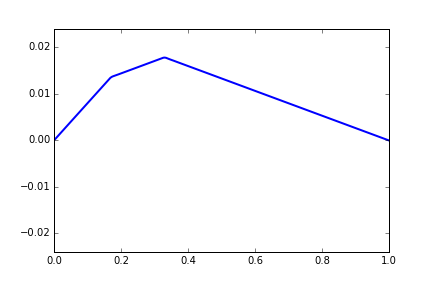
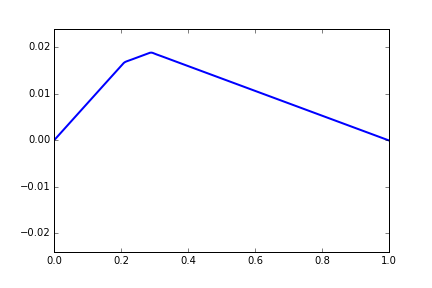
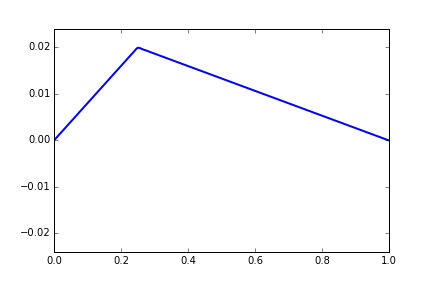
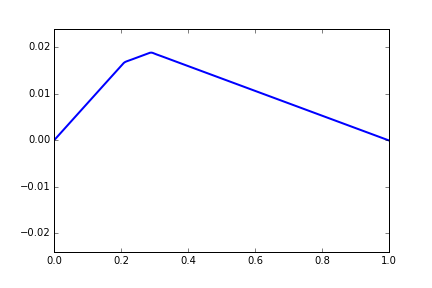
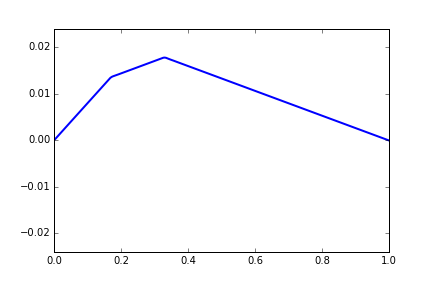
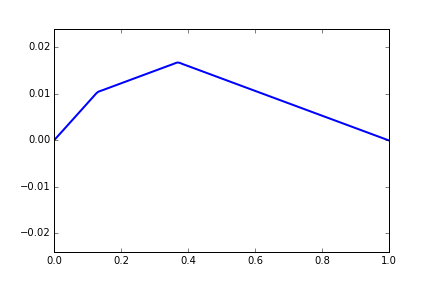
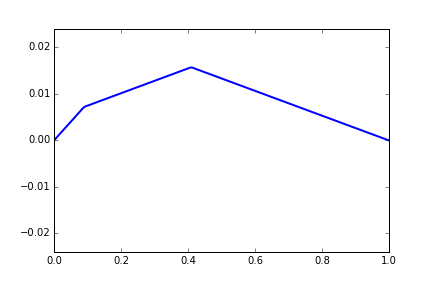
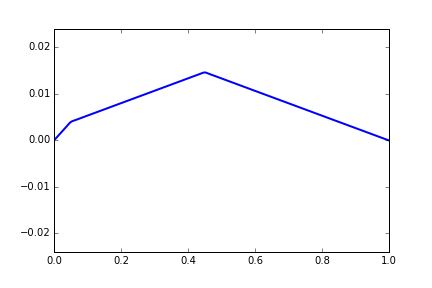
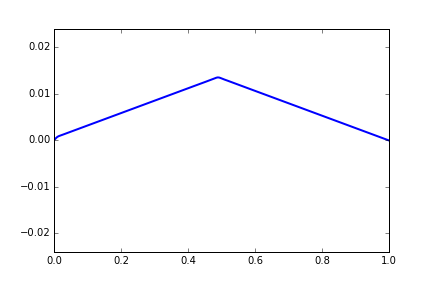
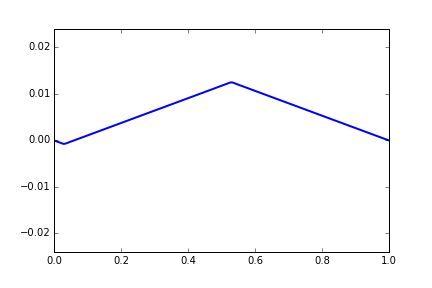
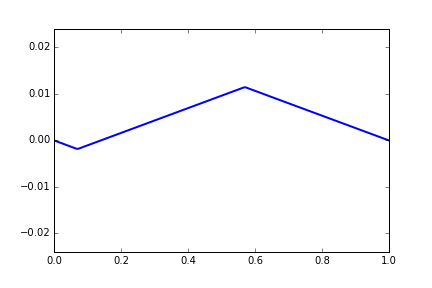
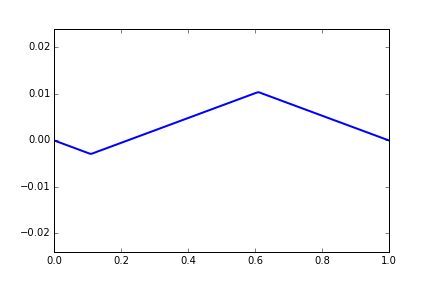
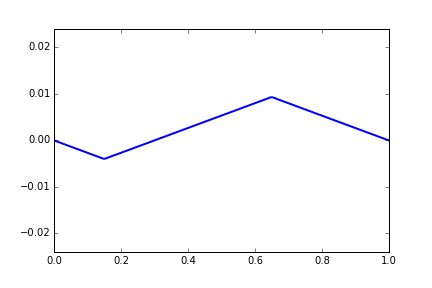
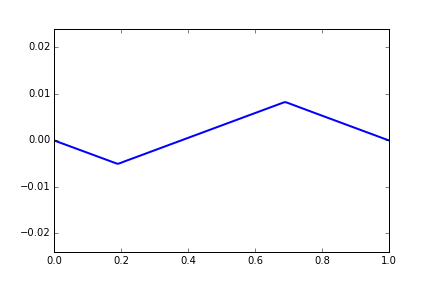
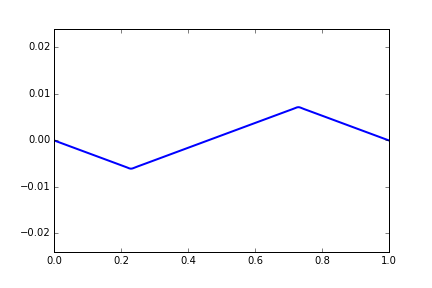
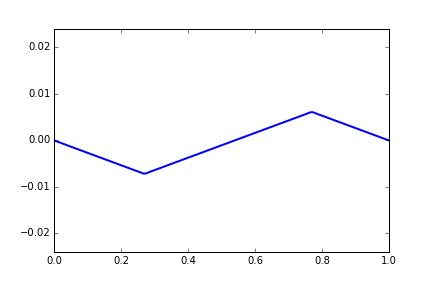
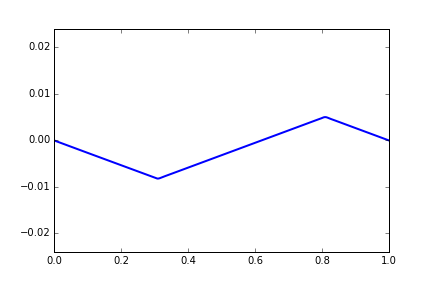
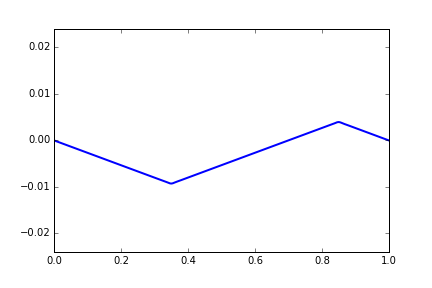
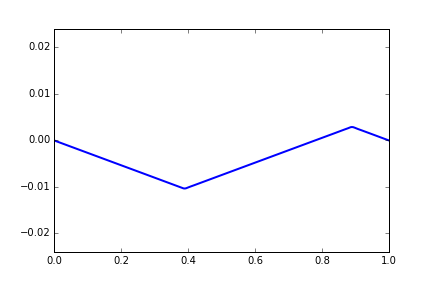
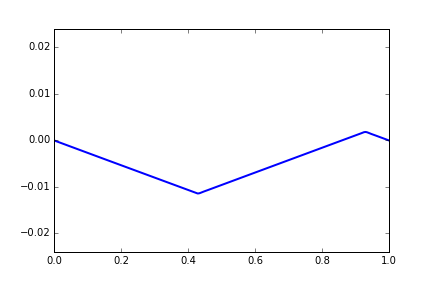
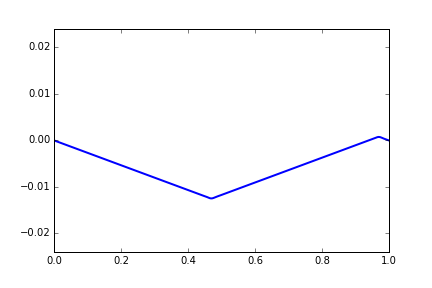
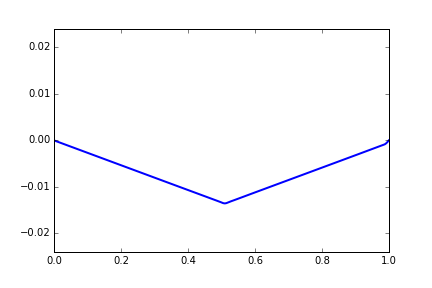
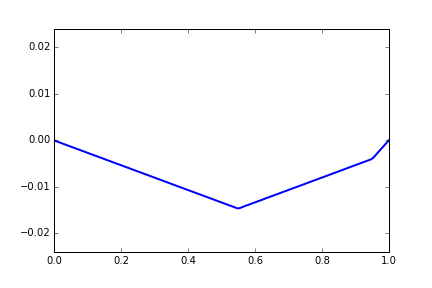
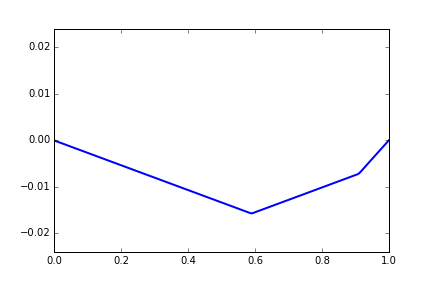
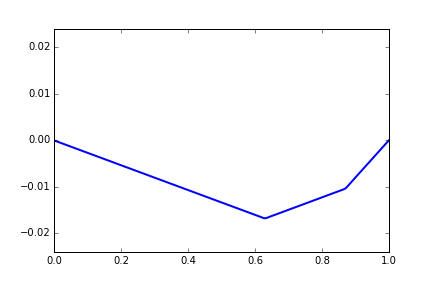
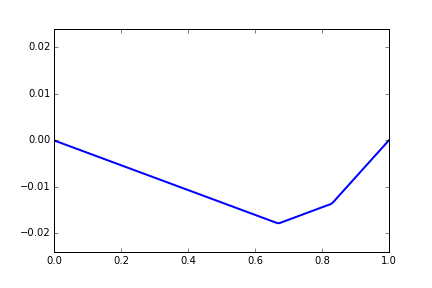
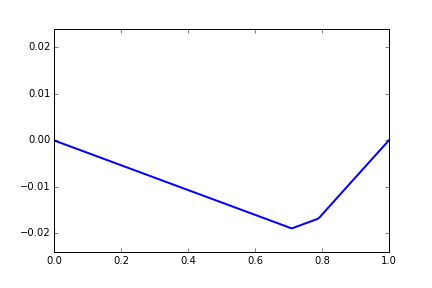
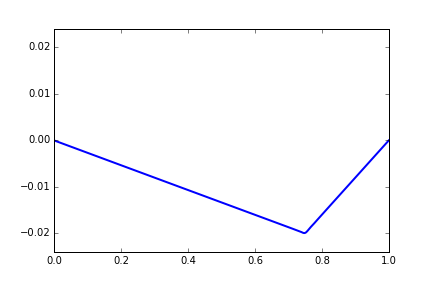
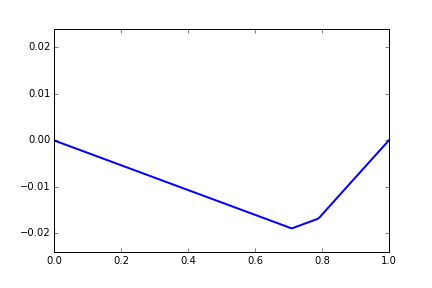
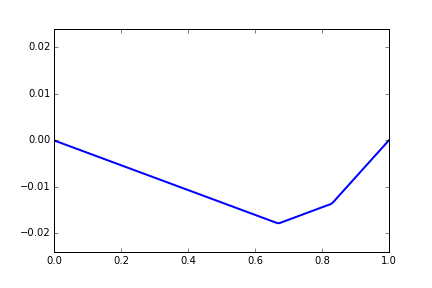
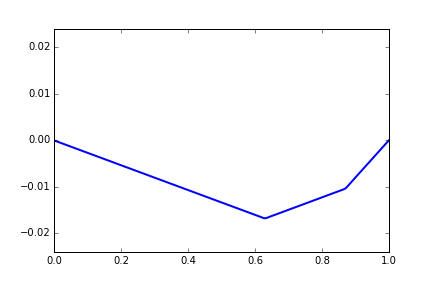
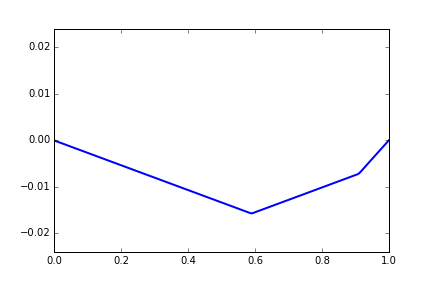
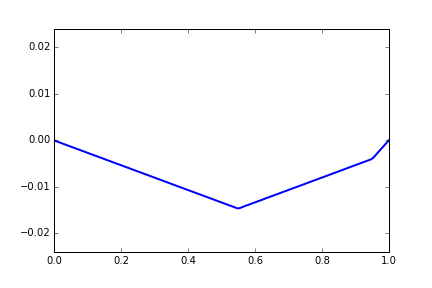
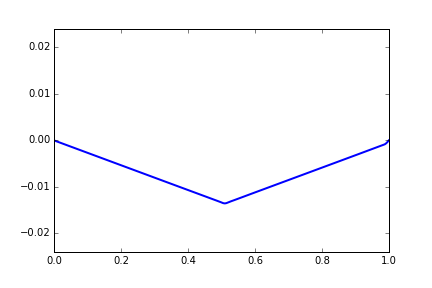
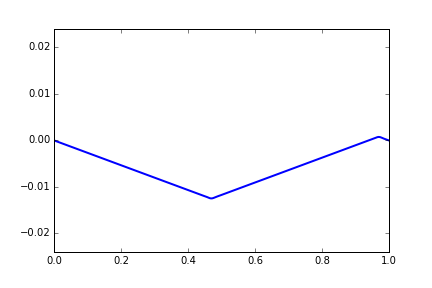
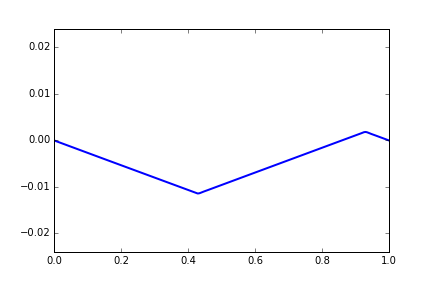
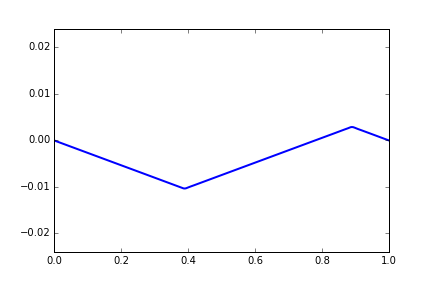
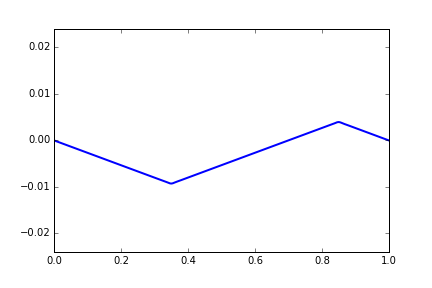
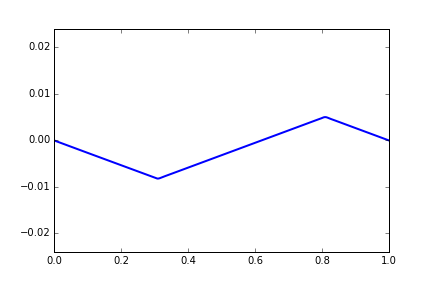
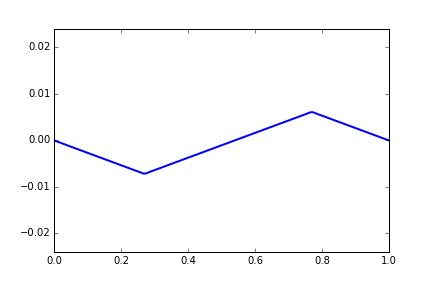
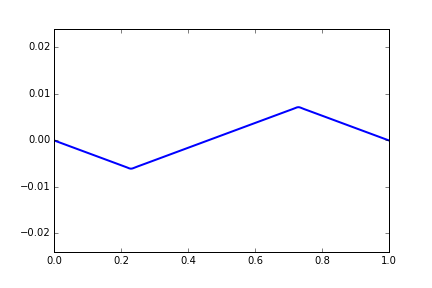
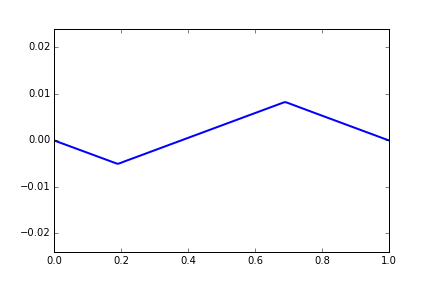
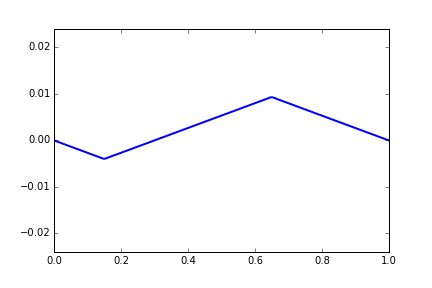
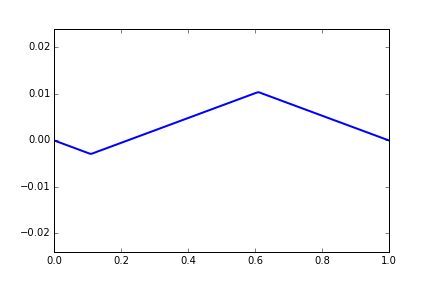
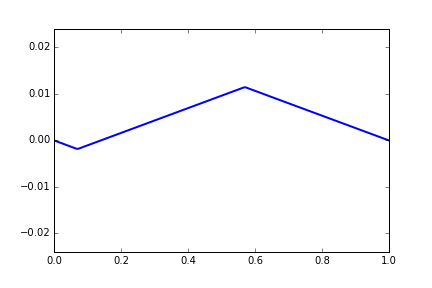
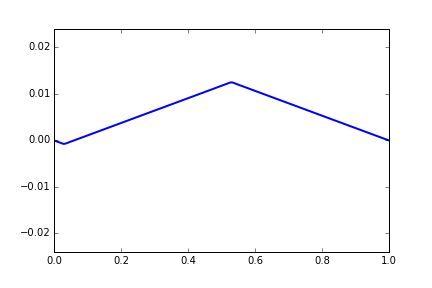
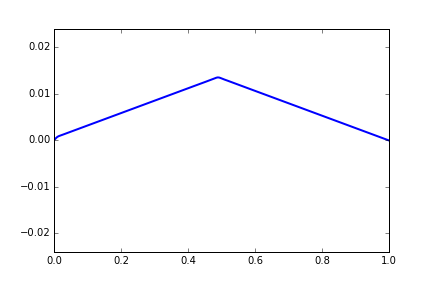
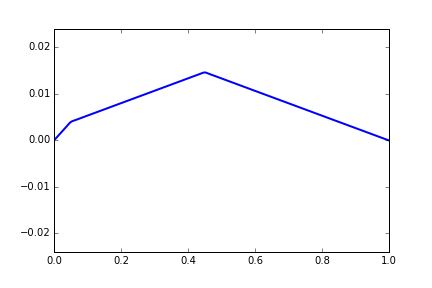
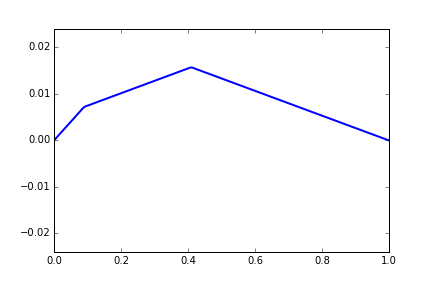
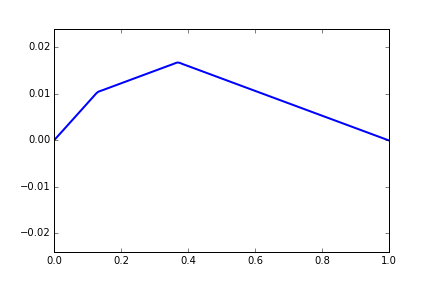
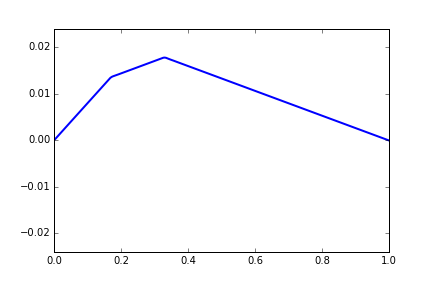
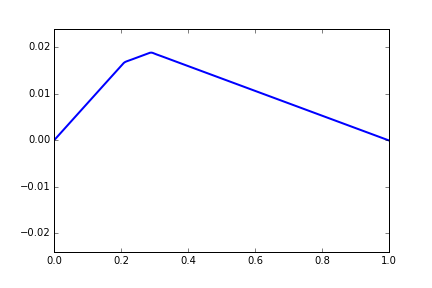

In [7]:
Nterms = 100

im = np.linspace(1,Nterms,Nterms).astype(int)

wm = im * np.pi / Long * np.sqrt(Tens/Rho)


fig = plt.figure()

ax = plt.axes(xlim=(0, Long), ylim=(-1.2*Delta, 1.2*Delta))

line, = ax.plot([], [], lw=2)

resolucion_x = 500

x = np.linspace(0, Long, resolucion_x)

im = np.linspace(1,Nterms,Nterms).astype(int)

wm = im * np.pi / Long * np.sqrt(Tens/Rho)

coef = 32.* Delta / (3. * np.pi**2.)

animation.FuncAnimation(fig, animate, init_func=init,

                        frames=100, interval=20, blit=True)

# Conclusiones

- Con 100 términos, la solución es bastante parecida a la solución que debe obtenerse. 

- La solución puede construirse como suma de dos ondas progresivas que mantienen la forma inicial.
  Este aspecto se vio en el apartado 2.5. del capítulo 2 (ver pdf entregado en clase). 
  Por tanto, la forma inicial "bilineal" ha de mantenerse durante el movimiento. 

- Con 100 términos se obtiene una forma bilineal bastante próxima a la que debe obtenerse. 

- En cada caso, es importante juzgar cuántos términos se necesitan en las series trigonométricas.



## Experimento de laboratorio

A continuación se muestra un enlace a una experiencia de laboratorio que reproduce este problema. 

Se trata del problema de la cuerda pulsada. 

La cuerda se desplaza transversalmente, y se suelta. Este caso reproduce de forma exacta las condiciones iniciales, pero no la física de la cuerda, ya que en el modelo considerado no se ha tenido en cuenta el amoriguamiento. 

Observe en el vídeo cómo, en los instantes iniciales, el movimiento se parece al descrito en las animaciones. Pero pasados unos ciclos, las características cambian debido al amortiguamiento de cada modo. 

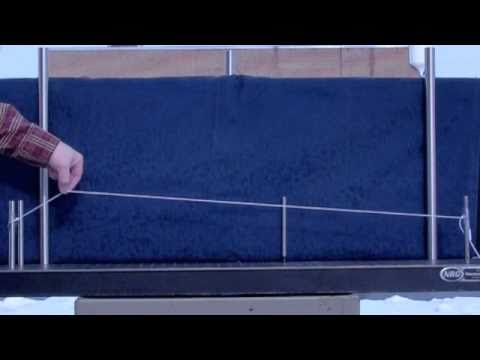

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('_X72on6CSL0')